--- Running Stochastic Process Demonstrations ---

--- Section A: Demonstrations of Standard Brownian Motion Properties ---

--- A.1. Demonstrating Self-Similarity (Standard BM) ---


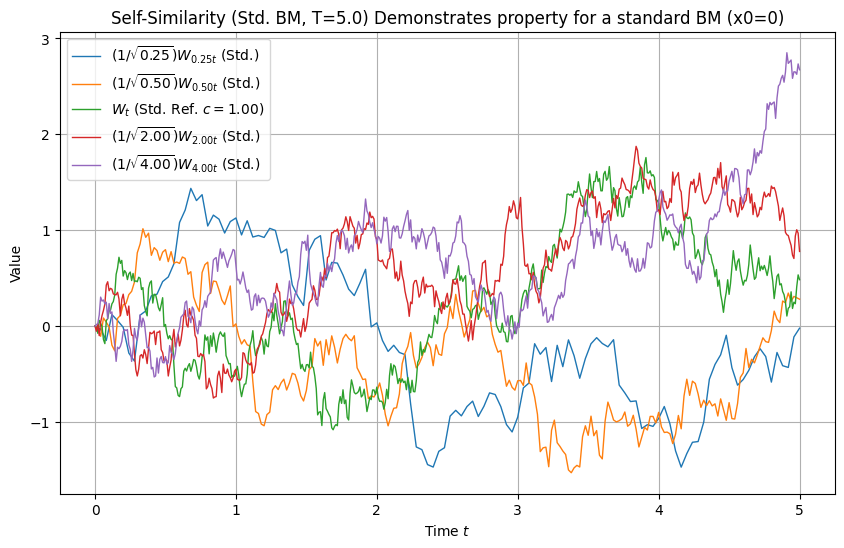


--- A.2. Demonstrating Time Reversal (Standard BM) ---


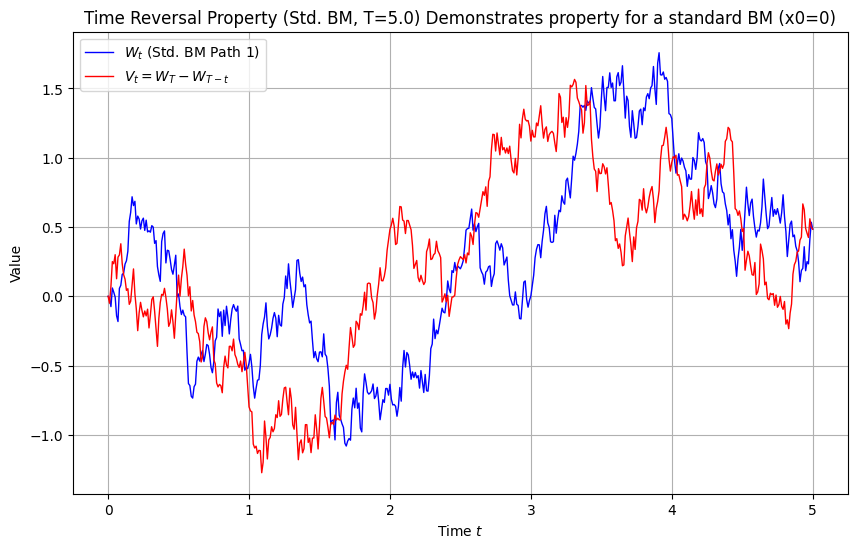


--- A.3. Demonstrating Time Inversion (Standard BM) ---


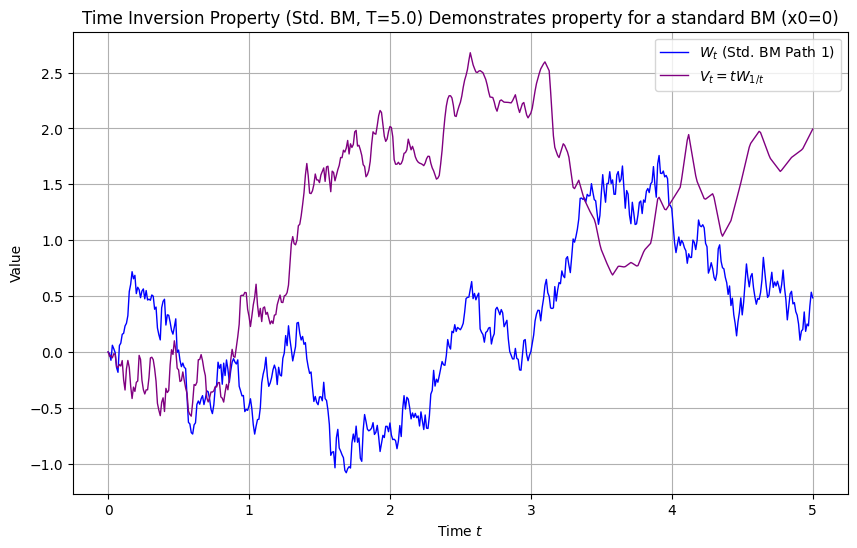


--- A.4. Demonstrating Symmetry (Standard BM) ---


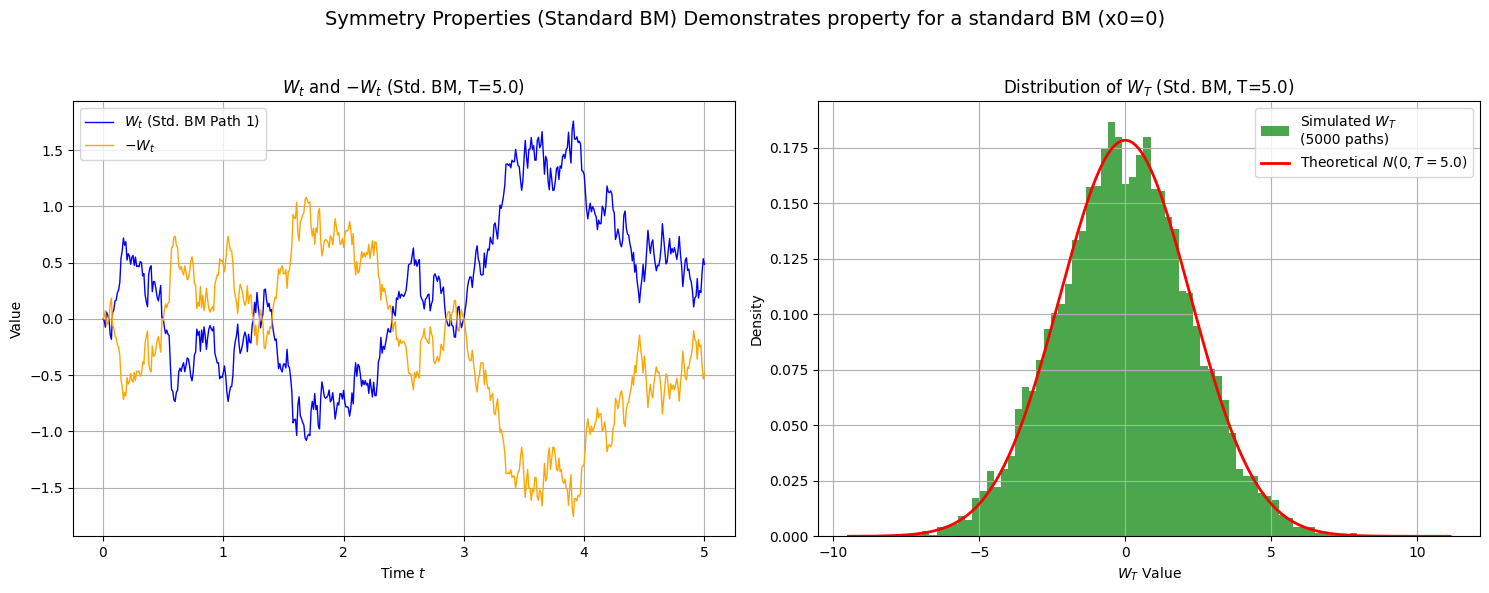


--- All Demonstrations Complete ---


In [1]:
import sys
import os

try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion,
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess
    )
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 


print("--- Running Stochastic Process Demonstrations ---")

# Standard parameters for demonstrations
T_DEMO = 20.0  # Time horizon
N_DEMO = 10001 # Number of time points (1000 steps)
PATHS_DEMO = 2 # Number of paths to plot for each process type

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 

GLOBAL_SEED = 452 



print("\n--- Section A: Demonstrations of Standard Brownian Motion Properties ---")
# For property demonstrations, we use a BM explicitly starting at x0=0
# The T and N parameters from the BM instance will be used by the get_..._data methods.
# Seed is also passed for reproducibility of the standard BM used in property demos.

T_PROPS = 5.0 # Can be different from T_DEMO if desired for property plots
N_PROPS = 501 # Can be different from N_DEMO

bm_std_props = BrownianMotion(x0=0.0, T=T_PROPS, N=N_PROPS, paths=1, seed=GLOBAL_SEED + 100)
# generate_paths() for this instance is not strictly necessary as property methods
# generate their own internal standard BMs, but it's harmless.
bm_std_props.generate_paths() 


# --- B.1. Self-Similarity of Standard BM ---
print("\n--- A.1. Demonstrating Self-Similarity (Standard BM) ---")
similarity_data_B1 = bm_std_props.get_self_similarity_data(c_values=[0.25, 0.5, 1.0, 2.0, 4.0])
if similarity_data_B1 and similarity_data_B1.get('paths_data'):
    ax_sim_B1 = plot_lines(t_values=similarity_data_B1['t_axis'], 
                       paths_data_list=similarity_data_B1['paths_data'],
                       path_labels_list=similarity_data_B1['labels'],
                       title=f'Self-Similarity (Std. BM, T={T_PROPS:.1f}) {similarity_data_B1.get("note","")}',
                       xlabel=f'Time $t$', ylabel='Value', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO), legend_loc='best')
    all_zero_B1 = all(np.allclose(p, 0.0, atol=1e-9) for p in similarity_data_B1['paths_data'])
    if all_zero_B1 and T_PROPS == 0: ax_sim_B1.set_ylim([-0.1, 0.1])
    plt.show()
else:
    print("Could not retrieve self-similarity data for standard BM.")

# --- B.2. Time Reversal of Standard BM ---
print("\n--- A.2. Demonstrating Time Reversal (Standard BM) ---")
reversal_data_B2 = bm_std_props.get_time_reversal_data() # path_index is for internal BM
if reversal_data_B2:
    ax_rev_B2 = plot_lines(t_values=reversal_data_B2['t_axis'], 
                       paths_data_list=[reversal_data_B2['W_original'], reversal_data_B2['V_transformed']],
                       path_labels_list=[f'$W_t$ (Std. BM Path {reversal_data_B2["path_index"]+1})', '$V_t = W_T - W_{T-t}$'],
                       title=f'Time Reversal Property (Std. BM, T={T_PROPS:.1f}) {reversal_data_B2.get("note","")}', 
                       xlabel='Time $t$', 
                       ylabel='Value', 
                       figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO),
                       colors=['blue', 'red'])
    if T_PROPS == 0 : ax_rev_B2.set_ylim([-0.1,0.1])
    plt.show()
else:
    print("Could not retrieve time reversal data for standard BM.")

# --- B.3. Time Inversion of Standard BM ---
print("\n--- A.3. Demonstrating Time Inversion (Standard BM) ---")
inversion_data_B3 = bm_std_props.get_time_inversion_data() # path_index is for internal BM
if inversion_data_B3:
    ax_inv_B3 = plot_lines(t_values=inversion_data_B3['t_axis'], 
                       paths_data_list=[inversion_data_B3['W_original'], inversion_data_B3['V_transformed']],
                       path_labels_list=[f'$W_t$ (Std. BM Path {inversion_data_B3["path_index"]+1})', '$V_t = t W_{1/t}$'],
                       title=f'Time Inversion Property (Std. BM, T={T_PROPS:.1f}) {inversion_data_B3.get("note","")}', 
                       xlabel='Time $t$', 
                       ylabel='Value', 
                       figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO), colors=['blue', 'purple'])
    if "not applicable" in inversion_data_B3.get("note","") or T_PROPS == 0:
         is_zero_path_B3 = np.allclose(inversion_data_B3.get('W_original', [1]), 0.0, atol=1e-9) 
         if is_zero_path_B3 : ax_inv_B3.set_ylim([-0.1,0.1])
    plt.show()
else:
    print("Could not retrieve time inversion data for standard BM.")

# --- B.4. Symmetry of Standard BM ---
print("\n--- A.4. Demonstrating Symmetry (Standard BM) ---")
# For num_paths_for_hist, the get_symmetry_data method handles generating new paths.
symmetry_data_B4 = bm_std_props.get_symmetry_data(path_index_for_std_bm_plot=0, num_paths_for_hist=5000)

if symmetry_data_B4:
    fig_sym_B4, axes_sym_B4 = plt.subplots(1, 2, figsize=(FIG_WIDTH_DEMO * 1.5, FIG_HEIGHT_DEMO))
    
    path_comp_data_B4 = symmetry_data_B4['path_comparison']
    ax_sym1_B4 = plot_lines(ax=axes_sym_B4[0], t_values=path_comp_data_B4['t_axis'], 
                       paths_data_list=[path_comp_data_B4['W_t'], path_comp_data_B4['-W_t']],
                       path_labels_list=[f'$W_t$ (Std. BM Path {path_comp_data_B4["path_index"]+1})', f'$-W_t$'],
                       title=f'$W_t$ and $-W_t$ (Std. BM, T={T_PROPS:.1f})', xlabel='Time $t$', ylabel='Value',
                       colors=['blue', 'orange'])
    if bm_std_props.T == 0 or bm_std_props.N <=1 : ax_sym1_B4.set_ylim([-0.1,0.1])

    wt_dist_data_B4 = symmetry_data_B4['WT_distribution']
    if wt_dist_data_B4 and isinstance(wt_dist_data_B4.get('WT_values'), np.ndarray) and wt_dist_data_B4['WT_values'].size > 0 :
        T_hist_B4 = wt_dist_data_B4['T_param']
        mu_theory_hist_B4 = 0
        sigma_theory_hist_B4 = np.sqrt(T_hist_B4) if T_hist_B4 > 0 else 1e-9
        
        data_min_hist_B4, data_max_hist_B4 = np.min(wt_dist_data_B4['WT_values']), np.max(wt_dist_data_B4['WT_values'])
        plot_range_min_hist_B4 = min(mu_theory_hist_B4 - 4*sigma_theory_hist_B4, data_min_hist_B4 - abs(data_min_hist_B4*0.1 if data_min_hist_B4 else 0.1) - sigma_theory_hist_B4*0.1 )
        plot_range_max_hist_B4 = max(mu_theory_hist_B4 + 4*sigma_theory_hist_B4, data_max_hist_B4 + abs(data_max_hist_B4*0.1 if data_max_hist_B4 else 0.1) + sigma_theory_hist_B4*0.1 )
        if np.isclose(plot_range_min_hist_B4, plot_range_max_hist_B4): 
             plot_range_min_hist_B4 -=0.1; plot_range_max_hist_B4 +=0.1

        x_norm_hist_B4 = np.linspace(plot_range_min_hist_B4, plot_range_max_hist_B4, 200)
        pdf_theory_hist_B4 = norm.pdf(x_norm_hist_B4, mu_theory_hist_B4, sigma_theory_hist_B4 if sigma_theory_hist_B4 > 1e-10 else 1e-9) 
        
        plot_histogram_with_pdf(ax=axes_sym_B4[1], data=wt_dist_data_B4['WT_values'], bins=75,
                                title=f'Distribution of $W_T$ (Std. BM, T={T_hist_B4:.1f})',
                                xlabel='$W_T$ Value', ylabel='Density',
                                hist_label=f'Simulated $W_T$\n({len(wt_dist_data_B4["WT_values"])} paths)',
                                pdf_x=x_norm_hist_B4, pdf_y=pdf_theory_hist_B4, 
                                pdf_label=f'Theoretical $N(0, T={T_hist_B4:.1f})$')
    else:
        axes_sym_B4[1].text(0.5,0.5, f"No W_T data for histogram.\n{wt_dist_data_B4.get('note','')}", ha='center', va='center', transform=axes_sym_B4[1].transAxes)
        axes_sym_B4[1].set_title(f'Distribution of $W_T$ (Std. BM, T={wt_dist_data_B4.get("T_param", "N/A"):.1f})')
    
    fig_sym_B4.suptitle(f"Symmetry Properties (Standard BM) {symmetry_data_B4.get('note','')}", fontsize=14)
    fig_sym_B4.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("Could not retrieve symmetry data for standard BM.")

print("\n--- All Demonstrations Complete ---")



--- Running Stochastic Process Demonstrations with Quadratic Variation Processes ---

--- B.1. Standard Brownian Motion (x0=0) ---


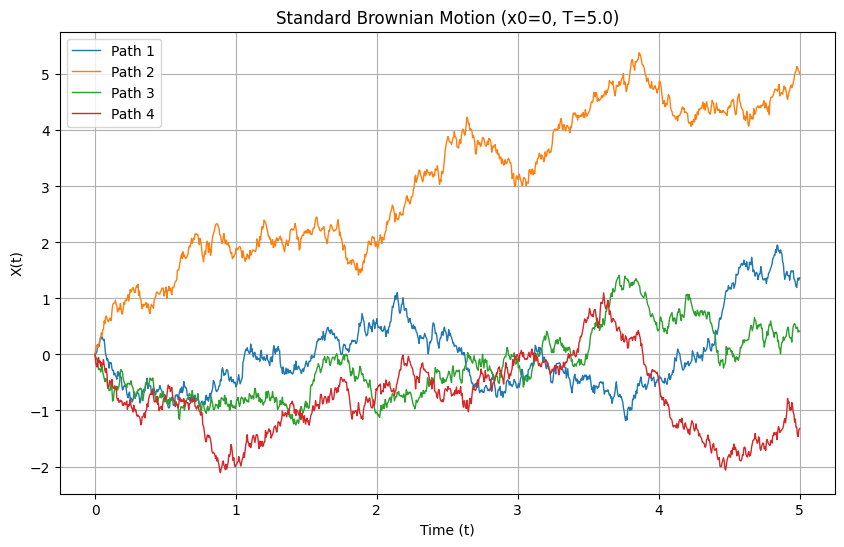

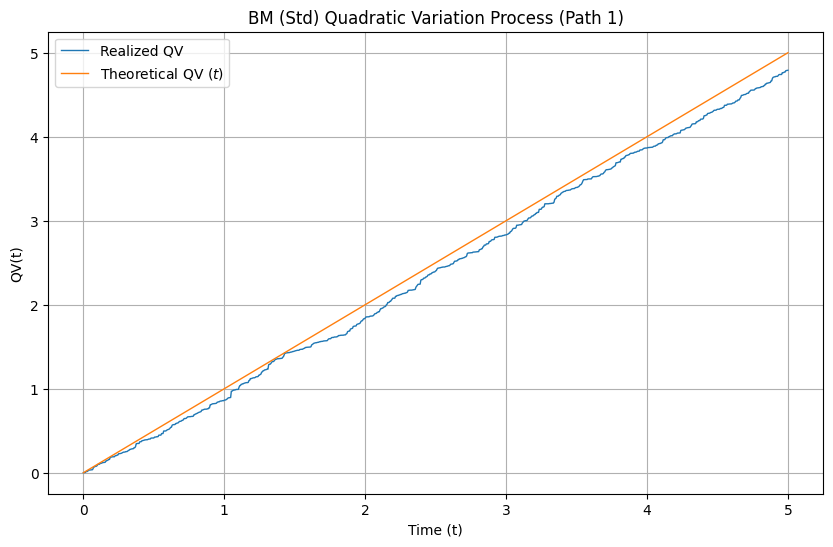

  BM (Std) Realized QV at T (Path 1): 4.7914
  BM (Std) Theoretical QV at T: 5.0000

--- B.2. Brownian Motion with Fixed x0 ---


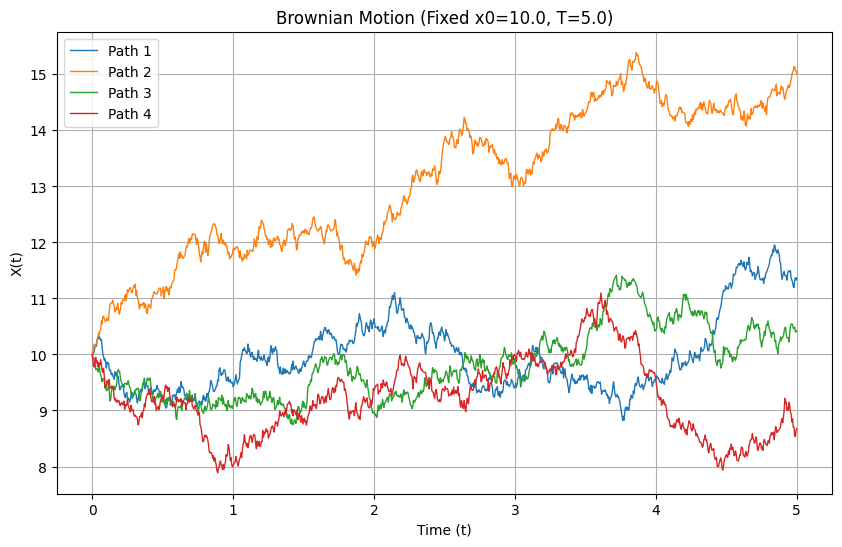

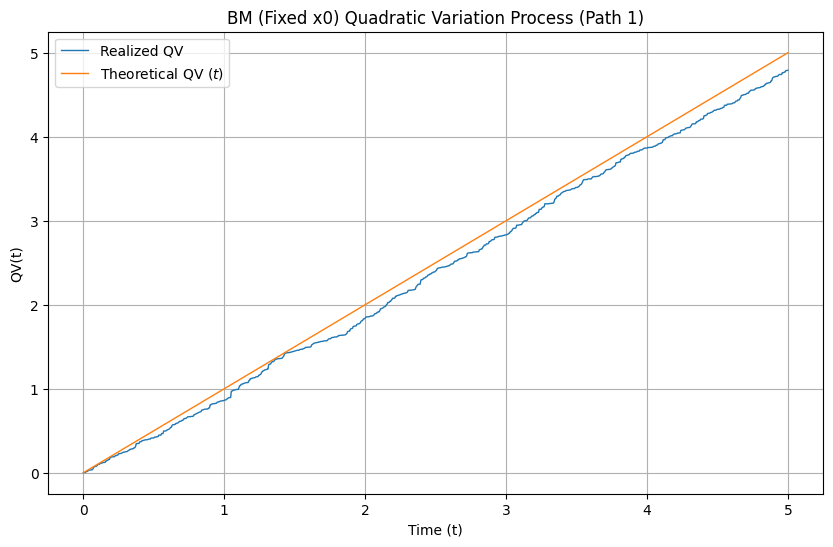

  BM (Fixed x0) Realized QV at T (Path 1): 4.7914
  BM (Fixed x0) Theoretical QV at T: 5.0000

--- B.3. Brownian Motion with x0 from Normal Distribution ---


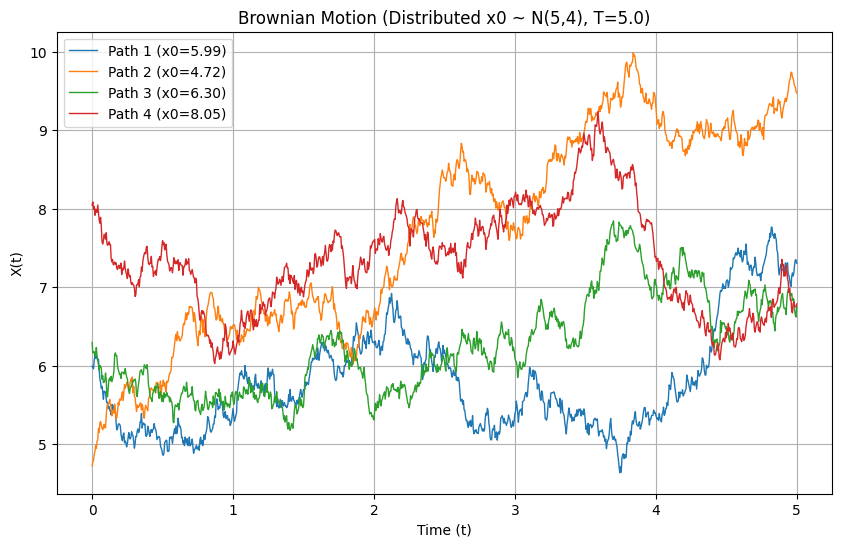

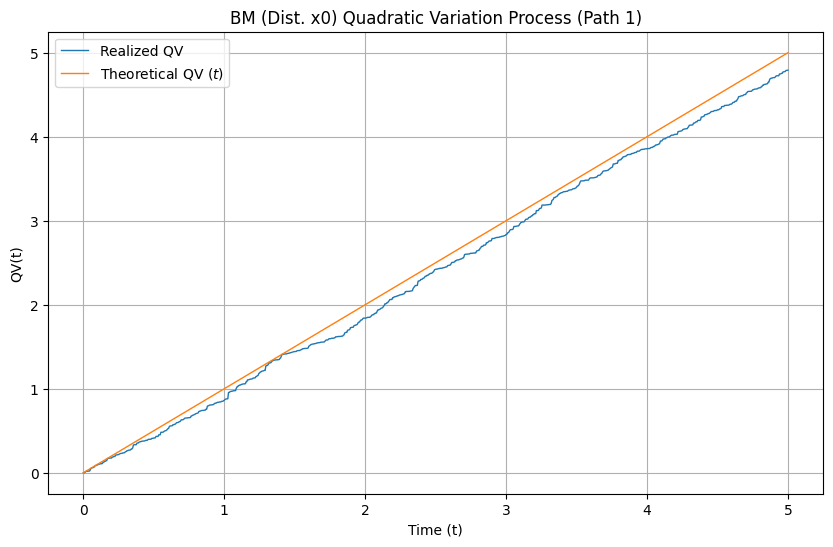

  BM (Dist. x0) Realized QV at T (Path 1): 4.7925
  BM (Dist. x0) Theoretical QV at T: 5.0000

--- B.4. Arithmetic Brownian Motion ---


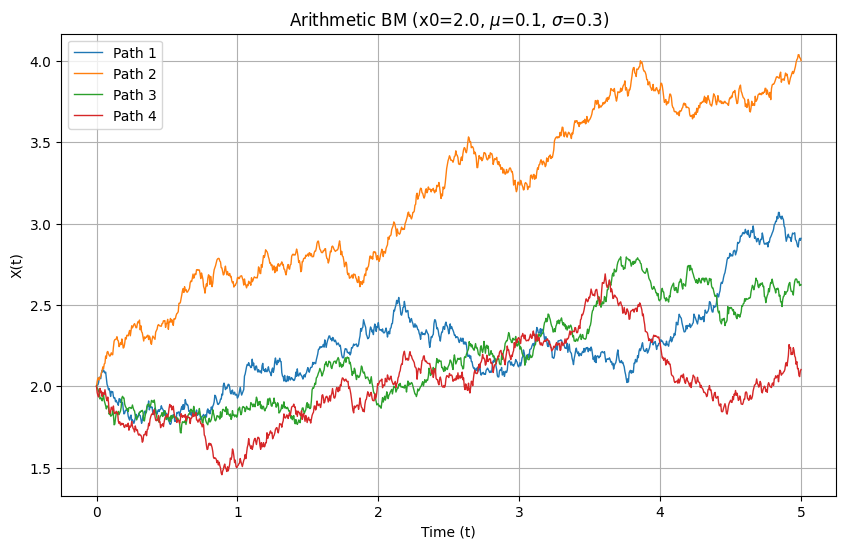

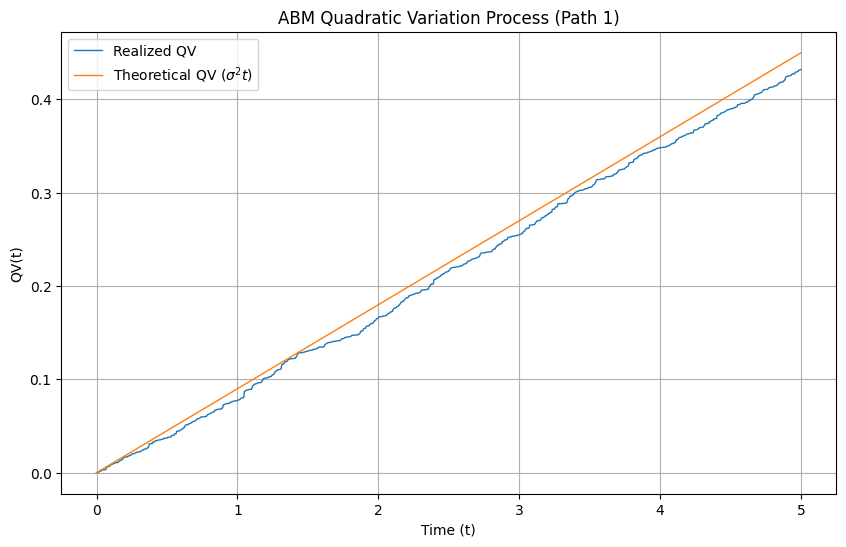

  ABM Realized QV at T (Path 1): 0.4319
  ABM Theoretical QV at T (sigma^2*T): 0.4500

--- B.5. Geometric Brownian Motion ---


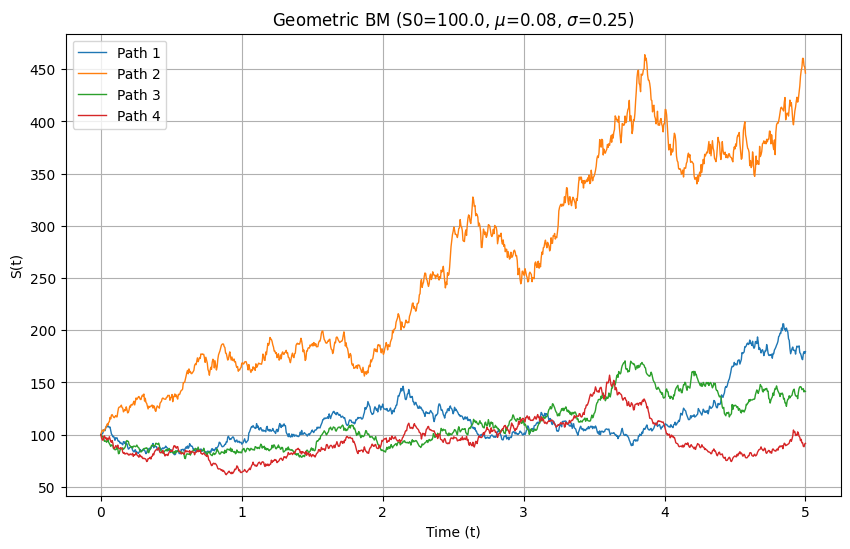

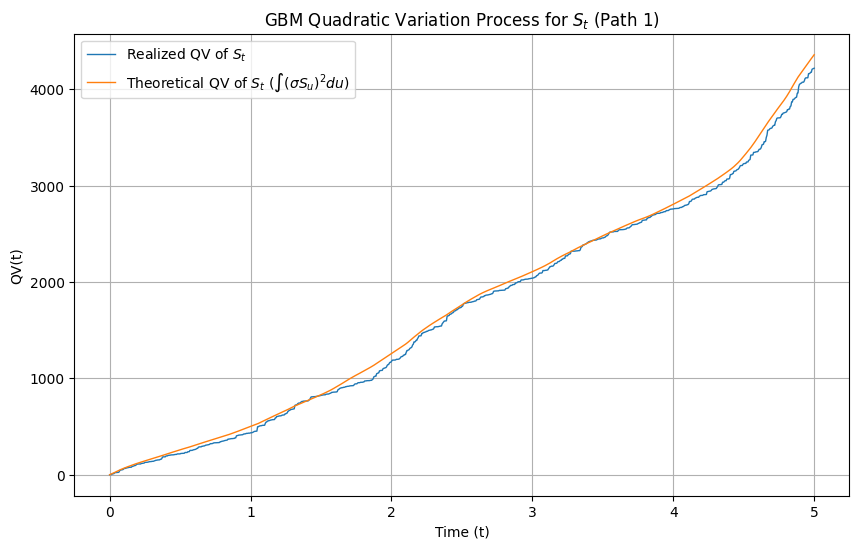

  GBM Realized QV of S_t at T (Path 1): 4217.5039
  GBM Path-dependent Theoretical QV of S_t at T (Path 1): 4357.3451


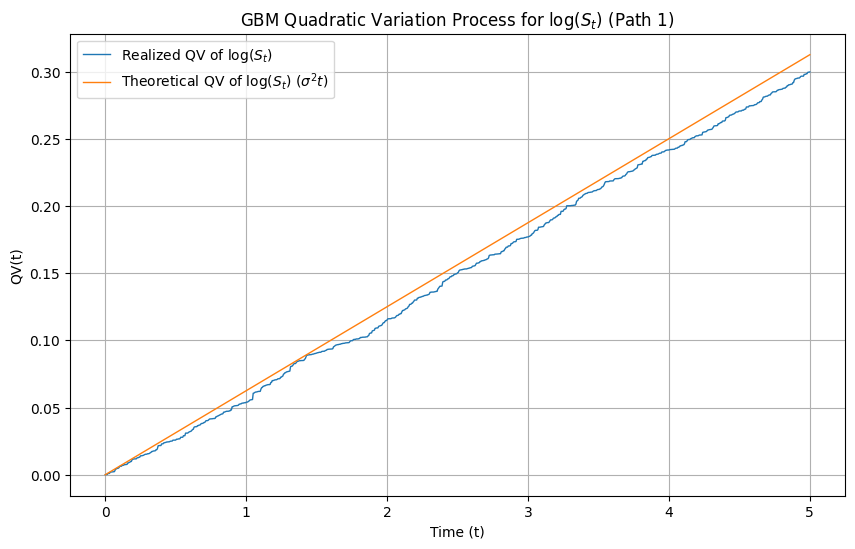

  GBM Realized QV of log(S_t) at T (Path 1): 0.2997
  GBM Theoretical QV of log(S_t) at T: 0.3125

--- B.6. Ornstein-Uhlenbeck Process ---


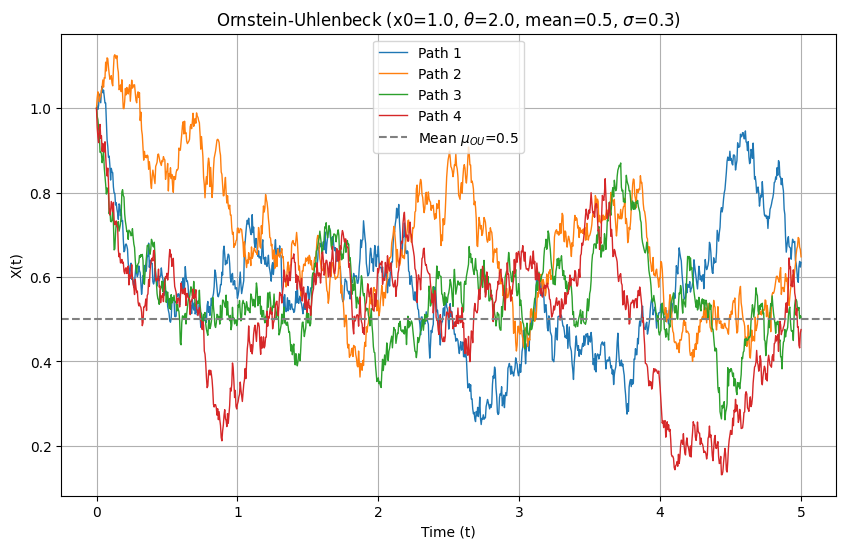

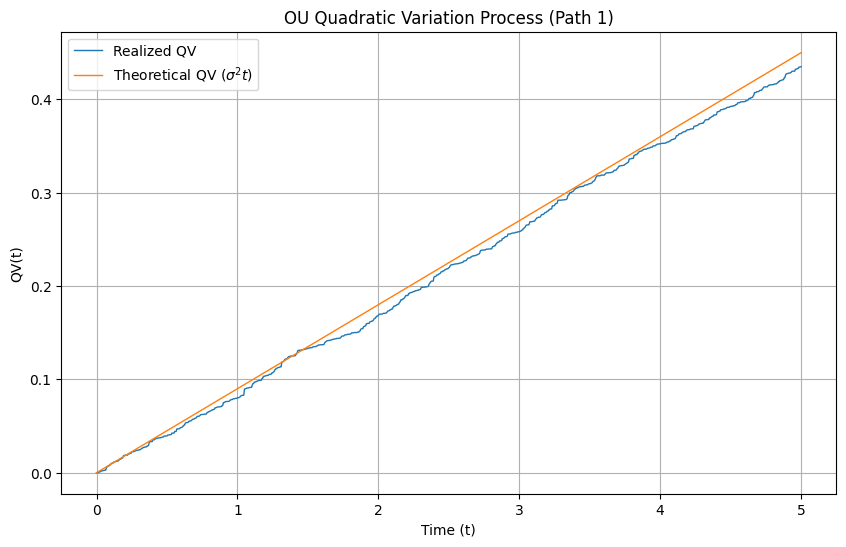

  OU Realized QV at T (Path 1): 0.4350
  OU Theoretical QV at T (sigma^2*T): 0.4500

--- B.7. Cox-Ingersoll-Ross Process ---


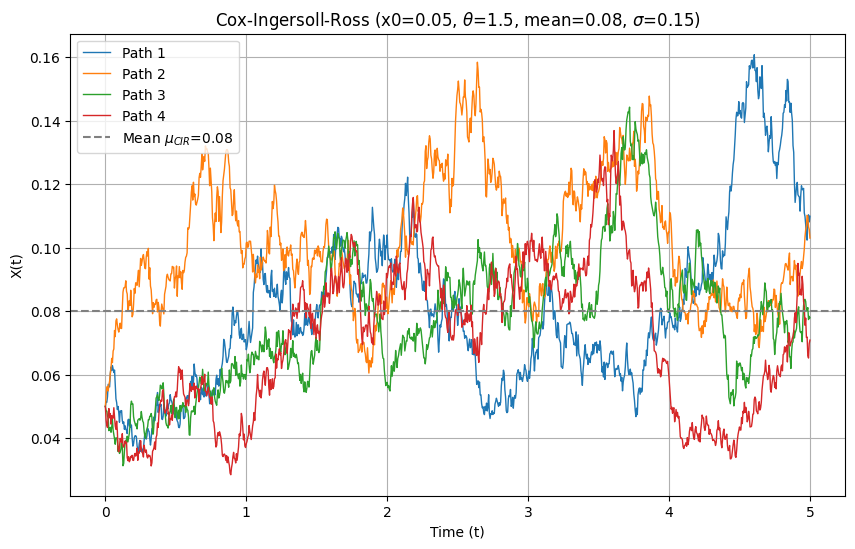

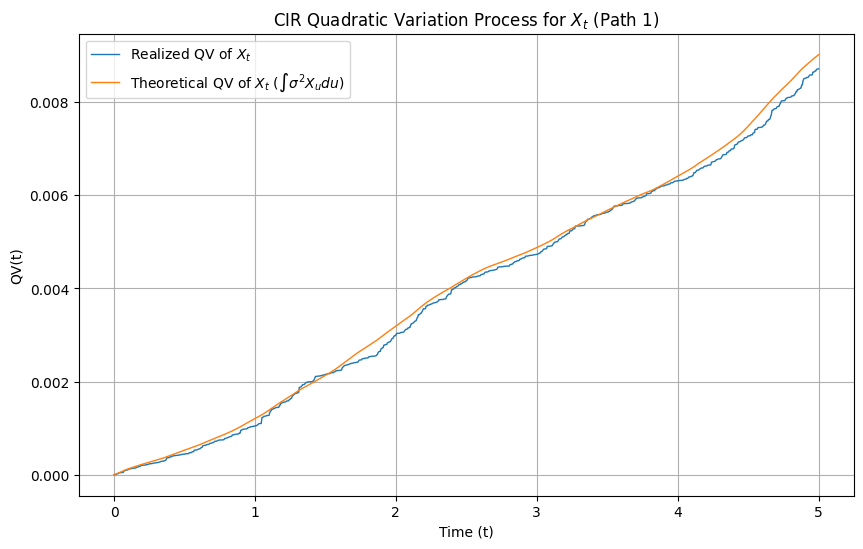

  CIR Realized QV of X_t at T (Path 1): 0.0087
  CIR Path-dependent Theoretical QV of X_t at T (Path 1): 0.0090

--- All Demonstrations Complete ---


In [2]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion,
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess
    )
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 


print("--- Running Stochastic Process Demonstrations with Quadratic Variation Processes ---")

T_DEMO = 5.0  
N_DEMO = 1001 
PATHS_DEMO = 4 
PATH_FOR_QV_PLOT = 0 # Plot QV for the first path

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 

GLOBAL_SEED = 42 

# --- Section A: Demonstrations of general processes ---

# --- A.1. Standard Brownian Motion (x0=0) ---
print("\n--- B.1. Standard Brownian Motion (x0=0) ---")
bm_std_A1 = BrownianMotion(x0=0.0, T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
bm_std_A1.generate_paths() 
plot_lines(bm_std_A1.t_values, [bm_std_A1.X[i,:] for i in range(PATHS_DEMO)], 
           [f'Path {i+1}' for i in range(PATHS_DEMO)],
           title=f'Standard Brownian Motion (x0=0, T={T_DEMO})',
           xlabel='Time (t)', ylabel='X(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()

realized_qv_process_bm_std = bm_std_A1.get_realized_quadratic_variation_process()
theoretical_qv_process_bm_std = bm_std_A1.get_theoretical_quadratic_variation_process()
plot_lines(bm_std_A1.t_values, 
           [realized_qv_process_bm_std[PATH_FOR_QV_PLOT,:], theoretical_qv_process_bm_std], 
           ['Realized QV', 'Theoretical QV ($t$)'],
           title=f'BM (Std) Quadratic Variation Process (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  BM (Std) Realized QV at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_bm_std[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  BM (Std) Theoretical QV at T: {theoretical_qv_process_bm_std[-1]:.4f}")

# --- A.2. Brownian Motion with Fixed x0 ---
print("\n--- B.2. Brownian Motion with Fixed x0 ---")
fixed_x0_A2 = 10.0
bm_fixed_x0_A2 = BrownianMotion(x0=fixed_x0_A2, T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
bm_fixed_x0_A2.generate_paths() 
plot_lines(bm_fixed_x0_A2.t_values, [bm_fixed_x0_A2.X[i,:] for i in range(PATHS_DEMO)],
           [f'Path {i+1}' for i in range(PATHS_DEMO)],
           title=f'Brownian Motion (Fixed x0={fixed_x0_A2}, T={T_DEMO})',
           xlabel='Time (t)', ylabel='X(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
realized_qv_process_bm_fixed_x0 = bm_fixed_x0_A2.get_realized_quadratic_variation_process()
theoretical_qv_process_bm_fixed_x0 = bm_fixed_x0_A2.get_theoretical_quadratic_variation_process() 
plot_lines(bm_fixed_x0_A2.t_values, 
           [realized_qv_process_bm_fixed_x0[PATH_FOR_QV_PLOT,:], theoretical_qv_process_bm_fixed_x0], 
           ['Realized QV', 'Theoretical QV ($t$)'],
           title=f'BM (Fixed x0) Quadratic Variation Process (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  BM (Fixed x0) Realized QV at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_bm_fixed_x0[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  BM (Fixed x0) Theoretical QV at T: {theoretical_qv_process_bm_fixed_x0[-1]:.4f}")


# --- B.3. Brownian Motion with x0 from Normal Distribution ---
print("\n--- B.3. Brownian Motion with x0 from Normal Distribution ---")
def x0_normal_dist_A3(): return np.random.normal(loc=5.0, scale=2.0) 
bm_dist_x0_A3 = BrownianMotion(x0=x0_normal_dist_A3, T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
bm_dist_x0_A3.generate_paths() 
plot_lines(bm_dist_x0_A3.t_values, [bm_dist_x0_A3.X[i,:] for i in range(PATHS_DEMO)],
           [f'Path {i+1} (x0={bm_dist_x0_A3.X[i,0]:.2f})' for i in range(PATHS_DEMO)],
           title=f'Brownian Motion (Distributed x0 ~ N(5,4), T={T_DEMO})',
           xlabel='Time (t)', ylabel='X(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
realized_qv_process_bm_dist_x0 = bm_dist_x0_A3.get_realized_quadratic_variation_process()
theoretical_qv_process_bm_dist_x0 = bm_dist_x0_A3.get_theoretical_quadratic_variation_process()
plot_lines(bm_dist_x0_A3.t_values, 
           [realized_qv_process_bm_dist_x0[PATH_FOR_QV_PLOT,:], theoretical_qv_process_bm_dist_x0], 
           ['Realized QV', 'Theoretical QV ($t$)'],
           title=f'BM (Dist. x0) Quadratic Variation Process (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  BM (Dist. x0) Realized QV at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_bm_dist_x0[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  BM (Dist. x0) Theoretical QV at T: {theoretical_qv_process_bm_dist_x0[-1]:.4f}")


# --- B.4. Arithmetic Brownian Motion ---
print("\n--- B.4. Arithmetic Brownian Motion ---")
abm_mu_A4, abm_sigma_A4, abm_x0_A4 = 0.1, 0.3, 2.0
abm_A4 = ArithmeticBrownianMotion(x0=abm_x0_A4, mu=abm_mu_A4, sigma=abm_sigma_A4, 
                               T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
abm_A4.generate_paths() 
plot_lines(abm_A4.t_values, [abm_A4.X[i,:] for i in range(PATHS_DEMO)],
           [f'Path {i+1}' for i in range(PATHS_DEMO)],
           title=f'Arithmetic BM (x0={abm_x0_A4}, $\\mu$={abm_mu_A4}, $\\sigma$={abm_sigma_A4})',
           xlabel='Time (t)', ylabel='X(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
realized_qv_process_abm = abm_A4.get_realized_quadratic_variation_process()
theoretical_qv_process_abm = abm_A4.get_theoretical_quadratic_variation_process()
plot_lines(abm_A4.t_values, 
           [realized_qv_process_abm[PATH_FOR_QV_PLOT,:], theoretical_qv_process_abm], 
           ['Realized QV', 'Theoretical QV ($\\sigma^2 t$)'],
           title=f'ABM Quadratic Variation Process (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  ABM Realized QV at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_abm[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  ABM Theoretical QV at T (sigma^2*T): {theoretical_qv_process_abm[-1]:.4f}")

# --- B.5. Geometric Brownian Motion ---
print("\n--- B.5. Geometric Brownian Motion ---")
gbm_S0_A5, gbm_mu_A5, gbm_sigma_A5 = 100.0, 0.08, 0.25 
gbm_A5 = GeometricBrownianMotion(S0=gbm_S0_A5, mu=gbm_mu_A5, sigma=gbm_sigma_A5,
                              T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
gbm_A5.generate_paths() 
plot_lines(gbm_A5.t_values, [gbm_A5.S[i,:] for i in range(PATHS_DEMO)],
           [f'Path {i+1}' for i in range(PATHS_DEMO)],
           title=f'Geometric BM (S0={gbm_S0_A5}, $\\mu$={gbm_mu_A5}, $\\sigma$={gbm_sigma_A5})',
           xlabel='Time (t)', ylabel='S(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
realized_qv_process_gbm = gbm_A5.get_realized_quadratic_variation_process()
path_dep_theoretical_qv_process_gbm = gbm_A5.get_path_dependent_theoretical_qv_process()
plot_lines(gbm_A5.t_values, 
           [realized_qv_process_gbm[PATH_FOR_QV_PLOT,:], 
            path_dep_theoretical_qv_process_gbm[PATH_FOR_QV_PLOT,:]], 
           ['Realized QV of $S_t$', 'Theoretical QV of $S_t$ ($\\int (\\sigma S_u)^2 du$)'],
           title=f'GBM Quadratic Variation Process for $S_t$ (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  GBM Realized QV of S_t at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_gbm[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  GBM Path-dependent Theoretical QV of S_t at T (Path {PATH_FOR_QV_PLOT+1}): {path_dep_theoretical_qv_process_gbm[PATH_FOR_QV_PLOT,-1]:.4f}")
# QV of log(S_t)
theoretical_qv_logS_process_gbm = gbm_A5.get_theoretical_quadratic_variation_logS_process()
# To get realized QV of log(S_t), we'd need log(S_t) path first
log_S_paths_gbm = np.log(gbm_A5.S)
log_S_increments_gbm = np.diff(log_S_paths_gbm, axis=1)
realized_qv_logS_process_gbm = np.concatenate((np.zeros((PATHS_DEMO,1)), np.cumsum(log_S_increments_gbm**2, axis=1)), axis=1)
plot_lines(gbm_A5.t_values, 
           [realized_qv_logS_process_gbm[PATH_FOR_QV_PLOT,:], 
            theoretical_qv_logS_process_gbm], 
           ['Realized QV of $\\log(S_t)$', 'Theoretical QV of $\\log(S_t)$ ($\\sigma^2 t$)'],
           title=f'GBM Quadratic Variation Process for $\\log(S_t)$ (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  GBM Realized QV of log(S_t) at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_logS_process_gbm[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  GBM Theoretical QV of log(S_t) at T: {theoretical_qv_logS_process_gbm[-1]:.4f}")


# --- b.6. Ornstein-Uhlenbeck Process ---
print("\n--- B.6. Ornstein-Uhlenbeck Process ---")
ou_x0_A6, ou_theta_A6, ou_mu_A6, ou_sigma_A6 = 1.0, 2.0, 0.5, 0.3
ou_A6 = OrnsteinUhlenbeckProcess(x0=ou_x0_A6, theta=ou_theta_A6, mu_ou=ou_mu_A6, sigma=ou_sigma_A6,
                             T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
ou_A6.generate_paths() 
plot_lines(ou_A6.t_values, [ou_A6.X[i,:] for i in range(PATHS_DEMO)],
           [f'Path {i+1}' for i in range(PATHS_DEMO)],
           title=f'Ornstein-Uhlenbeck (x0={ou_x0_A6}, $\\theta$={ou_theta_A6}, mean={ou_mu_A6}, $\\sigma$={ou_sigma_A6})',
           xlabel='Time (t)', ylabel='X(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.axhline(ou_mu_A6, color='gray', linestyle='--', label=f'Mean $\\mu_{{OU}}$={ou_mu_A6}') 
plt.legend()
plt.show()
realized_qv_process_ou = ou_A6.get_realized_quadratic_variation_process()
theoretical_qv_process_ou = ou_A6.get_theoretical_quadratic_variation_process()
plot_lines(ou_A6.t_values, 
           [realized_qv_process_ou[PATH_FOR_QV_PLOT,:], theoretical_qv_process_ou], 
           ['Realized QV', 'Theoretical QV ($\\sigma^2 t$)'],
           title=f'OU Quadratic Variation Process (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  OU Realized QV at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_ou[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  OU Theoretical QV at T (sigma^2*T): {theoretical_qv_process_ou[-1]:.4f}")

# --- B.7. Cox-Ingersoll-Ross Process ---
print("\n--- B.7. Cox-Ingersoll-Ross Process ---")
cir_x0_A7, cir_theta_A7, cir_mu_A7, cir_sigma_A7 = 0.05, 1.5, 0.08, 0.15
cir_A7 = CoxIngersollRossProcess(x0=cir_x0_A7, theta=cir_theta_A7, mu_cir=cir_mu_A7, sigma=cir_sigma_A7,
                              T=T_DEMO, N=N_DEMO, paths=PATHS_DEMO, seed=GLOBAL_SEED)
cir_A7.generate_paths() 
plot_lines(cir_A7.t_values, [cir_A7.X[i,:] for i in range(PATHS_DEMO)],
           [f'Path {i+1}' for i in range(PATHS_DEMO)],
           title=f'Cox-Ingersoll-Ross (x0={cir_x0_A7}, $\\theta$={cir_theta_A7}, mean={cir_mu_A7}, $\\sigma$={cir_sigma_A7})',
           xlabel='Time (t)', ylabel='X(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.axhline(cir_mu_A7, color='gray', linestyle='--', label=f'Mean $\\mu_{{CIR}}$={cir_mu_A7}') 
plt.legend()
plt.show()
realized_qv_process_cir = cir_A7.get_realized_quadratic_variation_process()
path_dep_theoretical_qv_process_cir = cir_A7.get_path_dependent_theoretical_qv_process()
plot_lines(cir_A7.t_values, 
           [realized_qv_process_cir[PATH_FOR_QV_PLOT,:], 
            path_dep_theoretical_qv_process_cir[PATH_FOR_QV_PLOT,:]], 
           ['Realized QV of $X_t$', 'Theoretical QV of $X_t$ ($\\int \\sigma^2 X_u du$)'],
           title=f'CIR Quadratic Variation Process for $X_t$ (Path {PATH_FOR_QV_PLOT+1})',
           xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()
print(f"  CIR Realized QV of X_t at T (Path {PATH_FOR_QV_PLOT+1}): {realized_qv_process_cir[PATH_FOR_QV_PLOT,-1]:.4f}")
print(f"  CIR Path-dependent Theoretical QV of X_t at T (Path {PATH_FOR_QV_PLOT+1}): {path_dep_theoretical_qv_process_cir[PATH_FOR_QV_PLOT,-1]:.4f}")





print("\n--- All Demonstrations Complete ---")




--- Running Stochastic Process Demonstrations with Quadratic Variation and Stochastic Integrals ---

--- Section C: Stochastic Integral Approximation ---
--- Approximating integral_0^t W_u dW_u using N_INT_DEMO=5001 steps ---


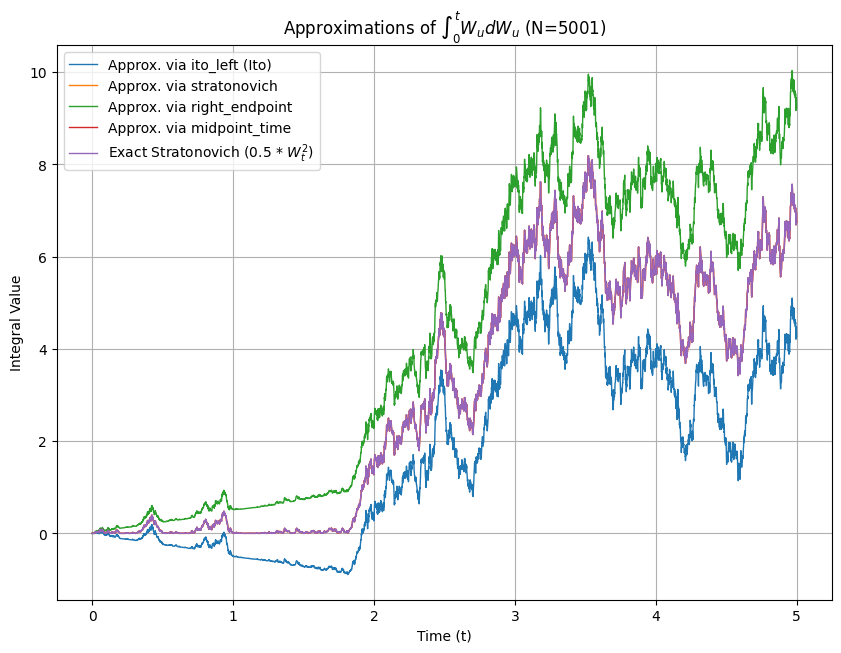

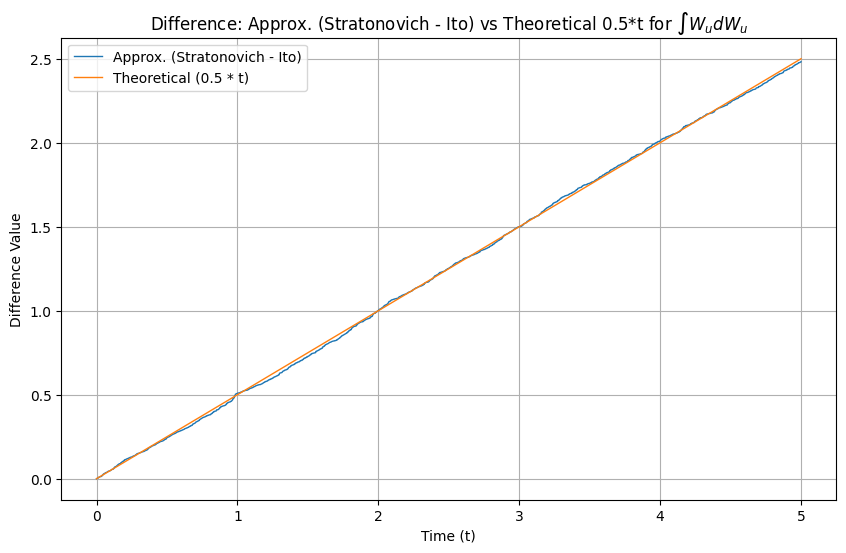


--- All Demonstrations Complete ---


In [3]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion,
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    # Example: If this script is in project_root and financial_toolkit is a subfolder
    # script_dir = os.path.dirname(os.path.abspath(__file__))
    # sys.path.insert(0, script_dir) # Add project_root to allow import of financial_toolkit
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 


print("--- Running Stochastic Process Demonstrations with Quadratic Variation and Stochastic Integrals ---")

T_DEMO = 5.0  
N_DEMO = 1001 # Number of time points for general process paths
N_INT_DEMO = 5001 # Higher N for more accurate integral approximation if desired
PATHS_DEMO = 4 
PATH_FOR_QV_PLOT = 0 
PATH_FOR_INT_PLOT = 0 # Which path to use for stochastic integral demo

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 

GLOBAL_SEED = 42 


# --- Section C: Stochastic Integral Approximation Demonstration ---
print("\n--- Section C: Stochastic Integral Approximation ---")
print(f"--- Approximating integral_0^t W_u dW_u using N_INT_DEMO={N_INT_DEMO} steps ---")

# Generate a single, finer BM path for integral approximation
bm_for_integral = BrownianMotion(x0=0.0, T=T_DEMO, N=N_INT_DEMO, paths=1, seed=GLOBAL_SEED + 200)
W_path_integral_demo = bm_for_integral.generate_paths()[0, :] # Get the first (and only) path
t_axis_integral_demo = bm_for_integral.t_values

# Define the integrand f(W_u) = W_u
def f_integrand_is_W(W_val): # Takes one argument: value of the process
    return W_val

# Define integrand f(t, W_u) = W_u (to test f(t,X) signature)
def f_integrand_is_W_t_X(t_val, W_val):
    return W_val


integrator = StochasticIntegralApproximator(
    integrand_f=f_integrand_is_W, # or f_integrand_is_W_t_X
    process_X_path=W_path_integral_demo,
    time_axis_t=t_axis_integral_demo
)

variants_to_test = ['ito_left', 'stratonovich', 'right_endpoint', 'midpoint_time']
integral_paths_data = []
integral_labels = []

for variant in variants_to_test:
    t_axis_result, integral_process = integrator.approximate_integral_process(variant=variant)
    integral_paths_data.append(integral_process)
    label = f'Approx. via {variant}'
    if variant == 'ito_left': label += ' (Ito)'
    integral_labels.append(label)

# Exact solution for Stratonovich integral_0^t W_u dW_u = 0.5 * (W_t^2 - W_0^2)
# W_0 = 0 for this standard BM path
exact_stratonovich_integral = 0.5 * (W_path_integral_demo**2) 
integral_paths_data.append(exact_stratonovich_integral)
integral_labels.append('Exact Stratonovich (0.5 * $W_t^2$)')

# Plot all approximated integral processes and the exact Stratonovich
plot_lines(t_axis_integral_demo,
           integral_paths_data,
           integral_labels,
           title=f'Approximations of $\\int_0^t W_u dW_u$ (N={N_INT_DEMO})',
           xlabel='Time (t)',
           ylabel='Integral Value',
           figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO * 1.2), # Slightly taller for more legends
           legend_loc='best')
plt.show()

# Optional: Plot differences between approximations, e.g., Stratonovich - Ito
idx_ito = variants_to_test.index('ito_left')
idx_strato_approx = variants_to_test.index('stratonovich')

diff_strato_ito_approx = integral_paths_data[idx_strato_approx] - integral_paths_data[idx_ito]

# Theoretical difference: Stratonovich - Ito = 0.5 * [W,W]_t = 0.5 * t
theoretical_diff = 0.5 * t_axis_integral_demo

plot_lines(t_axis_integral_demo,
           [diff_strato_ito_approx, theoretical_diff],
           ['Approx. (Stratonovich - Ito)', 'Theoretical (0.5 * t)'],
           title=f'Difference: Approx. (Stratonovich - Ito) vs Theoretical 0.5*t for $\\int W_u dW_u$',
           xlabel='Time (t)',
           ylabel='Difference Value',
           figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()

print("\n--- All Demonstrations Complete ---")





--- Running Stochastic Process Demonstrations, BSM, and Hedging ---

--- D.1. European Call Option Pricing ---
  Analytical BSM Price: 19.7898
  Monte Carlo BSM Price: 19.7544 (Std Err: 0.1252)
  Difference (MC - Analytical): -0.0354

--- D.2. Option Greeks ---
  Delta: 0.5996
  Gamma: 0.0077
  Vega (per 1 unit vol change): 38.6433 (i.e., per 0.01 vol change: 0.3864)
  Theta (per year): -11.6695 (i.e., per day approx: -0.0463)
  Rho (per 1 unit rate change): 40.1743 (i.e., per 0.01 rate change: 0.4017)

--- D.3. Delta Hedging Simulation ---
  Generating underlying asset path with S0=100.0, mu=0.19, sigma=0.50

  Case 1: Perfect Hedge (Hedging Vol = True Vol = 0.50)
    Final Hedging P&L: -4.5086
    (Portfolio: 138.20, Option Payoff: 142.71)

  Case 2: Misspecified Hedge (Hedging Vol = 0.75, True Vol = 0.50)
    Final Hedging P&L: 2.2677
    (Portfolio: 144.98, Option Payoff: 142.71)


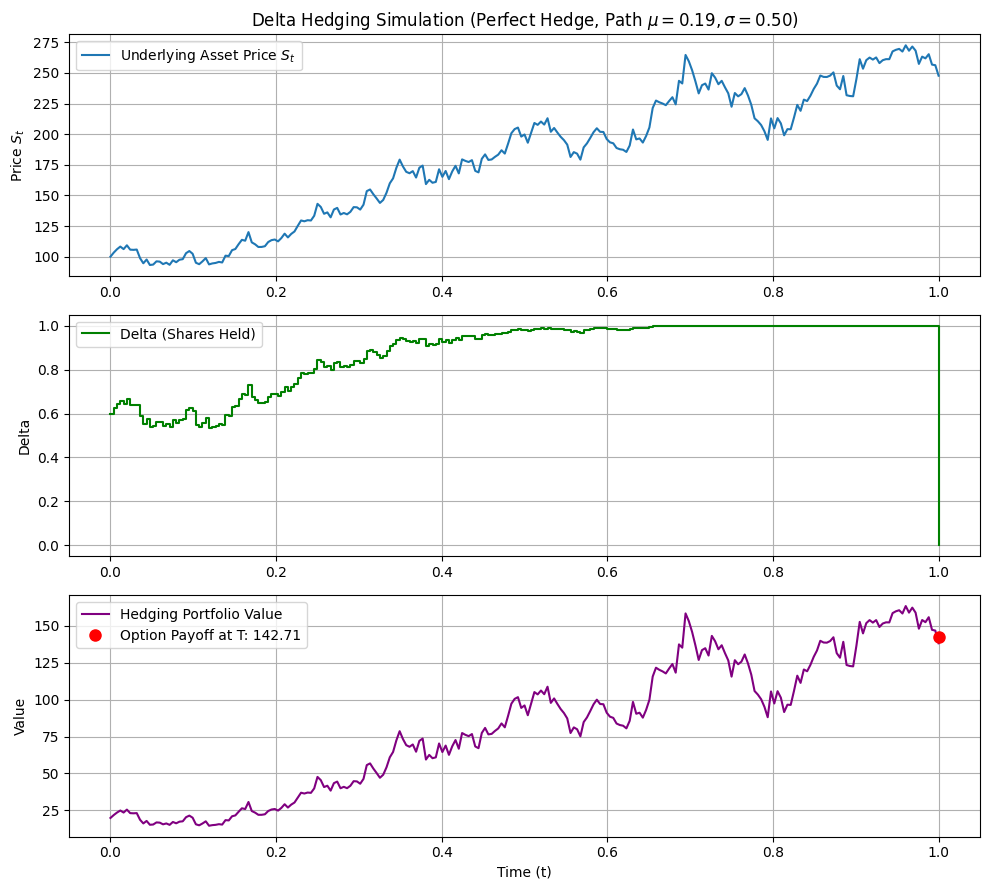


--- All Demonstrations Complete ---


In [4]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, # Needed for Delta Hedging path
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator # New import
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 


print("--- Running Stochastic Process Demonstrations, BSM, and Hedging ---")

# Standard parameters for demonstrations
T_DEMO = 10.0  # Time horizon (e.g., 1 year for option)
N_DEMO_PROCESS = 253 # Number of time points for general process paths (e.g., daily steps for 1 year)
N_DEMO_MC = 100000   # Number of paths for Monte Carlo option pricing
N_DEMO_HEDGE = 253   # Number of rebalancing steps for hedging (e.g., daily)

PATHS_DEMO_GENERAL = 4 # Number of paths to plot for general processes
PATH_FOR_QV_PLOT = 0 
PATH_FOR_INT_PLOT = 0 

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 

GLOBAL_SEED  = 589



# Option Parameters
S0_opt = 100.0
K_opt = 105.0
T_opt = 1.0 # 1 year
r_opt = 0.05 # 5% risk-free rate
sigma_opt_true = 0.5 # True volatility of the underlying
option_type_opt = 'call'

# D.1 European Option Pricing
print(f"\n--- D.1. European {option_type_opt.capitalize()} Option Pricing ---")
european_option = EuropeanOptionBSM(S0=S0_opt, K=K_opt, T=T_opt, r=r_opt, sigma=sigma_opt_true, option_type=option_type_opt)

analytical_price = european_option.price()
print(f"  Analytical BSM Price: {analytical_price:.4f}")

mc_price, mc_std_err = european_option.mc_price(num_simulations=N_DEMO_MC, seed=GLOBAL_SEED + 300)
print(f"  Monte Carlo BSM Price: {mc_price:.4f} (Std Err: {mc_std_err:.4f})")
print(f"  Difference (MC - Analytical): {mc_price - analytical_price:.4f}")

# D.2 Greeks
print(f"\n--- D.2. Option Greeks ---")
print(f"  Delta: {european_option.delta():.4f}")
print(f"  Gamma: {european_option.gamma():.4f}")
print(f"  Vega (per 1 unit vol change): {european_option.vega():.4f} (i.e., per 0.01 vol change: {european_option.vega()*0.01:.4f})")
print(f"  Theta (per year): {european_option.theta():.4f} (i.e., per day approx: {european_option.theta()/252:.4f})")
print(f"  Rho (per 1 unit rate change): {european_option.rho():.4f} (i.e., per 0.01 rate change: {european_option.rho()*0.01:.4f})")

# D.3 Delta Hedging Simulation
print(f"\n--- D.3. Delta Hedging Simulation ---")
# Generate a path for the underlying asset.
# For this example, the underlying asset's path is generated with mu = r_opt.
# This simulates a scenario where the "real-world" drift matches the risk-free rate.
# In a more general simulation, mu could be different from r_opt to represent
# an actual expected market return, while the hedging delta is still calculated using r_opt.
actual_mu_for_path = 0.19 # Could be different, e.g., 0.10 for a 10% expected return
print(f"  Generating underlying asset path with S0={S0_opt}, mu={actual_mu_for_path:.2f}, sigma={sigma_opt_true:.2f}")
underlying_gbm_for_hedge = GeometricBrownianMotion(
    S0=S0_opt, mu=actual_mu_for_path, sigma=sigma_opt_true, 
    T=T_opt, N=N_DEMO_HEDGE, paths=1, seed=GLOBAL_SEED + 400
)
S_path_for_hedge = underlying_gbm_for_hedge.generate_paths()[0,:]
t_axis_for_hedge = underlying_gbm_for_hedge.t_values

# Case 1: Perfect hedge (hedging_sigma = true_sigma)
print(f"\n  Case 1: Perfect Hedge (Hedging Vol = True Vol = {sigma_opt_true:.2f})")
hedger_perfect = DeltaHedgingSimulator(
    option=european_option, 
    underlying_S_path=S_path_for_hedge,
    time_axis=t_axis_for_hedge,
    hedging_sigma=sigma_opt_true 
)
hedge_results_perfect = hedger_perfect.simulate_hedge()
print(f"    Final Hedging P&L: {hedge_results_perfect['hedging_pnl']:.4f}")
print(f"    (Portfolio: {hedge_results_perfect['final_portfolio_value']:.2f}, Option Payoff: {hedge_results_perfect['option_payoff']:.2f})")

# Case 2: Misspecified volatility for hedging
sigma_opt_hedge_misspecified = sigma_opt_true * 1.5 # e.g., 0.30 if true is 0.20
print(f"\n  Case 2: Misspecified Hedge (Hedging Vol = {sigma_opt_hedge_misspecified:.2f}, True Vol = {sigma_opt_true:.2f})")
hedger_misspecified = DeltaHedgingSimulator(
    option=european_option, 
    underlying_S_path=S_path_for_hedge,
    time_axis=t_axis_for_hedge,
    hedging_sigma=sigma_opt_hedge_misspecified
)
hedge_results_misspecified = hedger_misspecified.simulate_hedge()
print(f"    Final Hedging P&L: {hedge_results_misspecified['hedging_pnl']:.4f}")
print(f"    (Portfolio: {hedge_results_misspecified['final_portfolio_value']:.2f}, Option Payoff: {hedge_results_misspecified['option_payoff']:.2f})")

# Plotting the hedging simulation results for the perfect hedge case
plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO * 1.5)) 

plt.subplot(3, 1, 1)
plt.plot(t_axis_for_hedge, S_path_for_hedge, label='Underlying Asset Price $S_t$')
plt.title(f'Delta Hedging Simulation (Perfect Hedge, Path $\\mu={actual_mu_for_path:.2f}, \\sigma={sigma_opt_true:.2f}$)')
plt.ylabel('Price $S_t$')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
# Use plt.step to show delta is held constant over each interval [t_i, t_{i+1})
# hedge_results_perfect['delta_shares_over_time'][i] is the delta at t_i
# The last value is delta at T (which is 0 after liquidation).
plt.step(t_axis_for_hedge, hedge_results_perfect['delta_shares_over_time'], 
         where='post', label='Delta (Shares Held)', color='green')
plt.ylabel('Delta')
plt.ylim(min(0, np.min(hedge_results_perfect['delta_shares_over_time'])) - 0.05, 
         max(1, np.max(hedge_results_perfect['delta_shares_over_time'])) + 0.05) # Ensure 0-1 range is visible
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_axis_for_hedge, hedge_results_perfect['portfolio_values_over_time'], label='Hedging Portfolio Value', color='purple')
option_payoff_line = np.full_like(t_axis_for_hedge, np.nan)
option_payoff_line[-1] = hedge_results_perfect['option_payoff']
plt.plot(t_axis_for_hedge, option_payoff_line, 'ro', markersize=8, label=f'Option Payoff at T: {hedge_results_perfect["option_payoff"]:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


print("\n--- All Demonstrations Complete ---")




--- Running Stochastic Process Demonstrations including Heston Model & Option Pricing ---

--- A.8. Heston Stochastic Volatility Model Path Generation ---


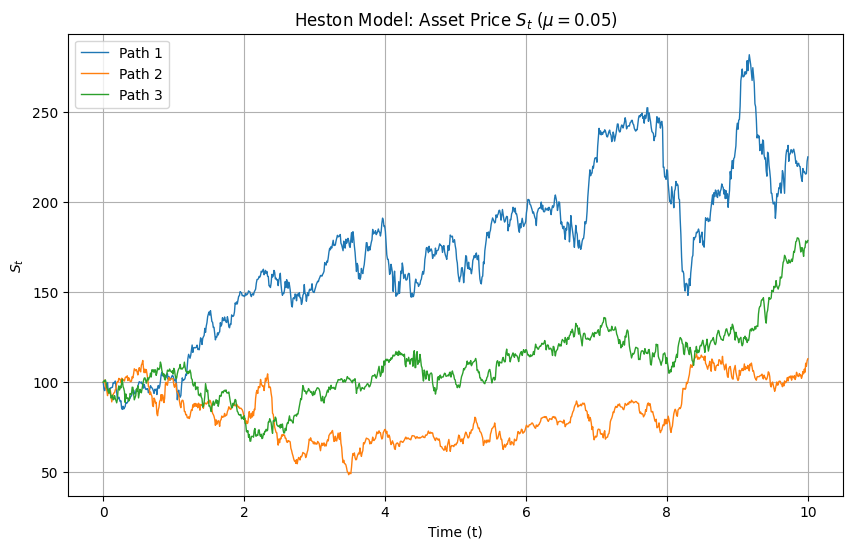

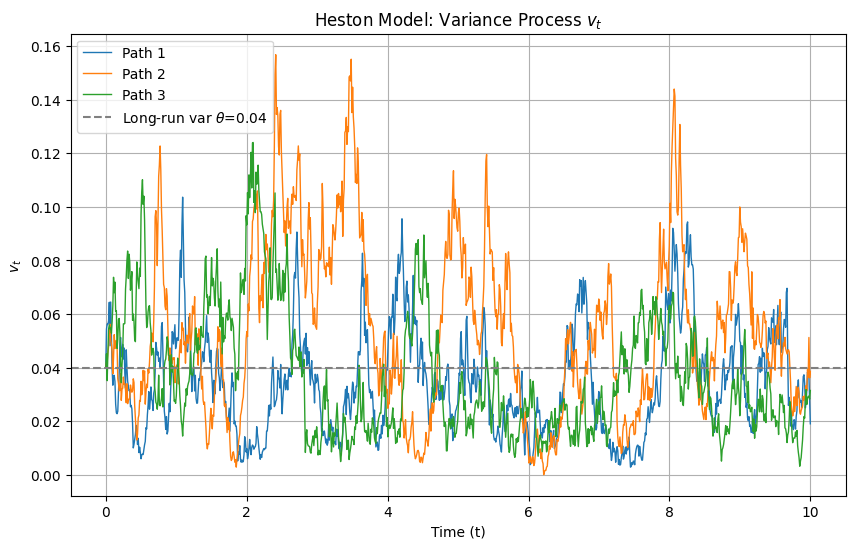

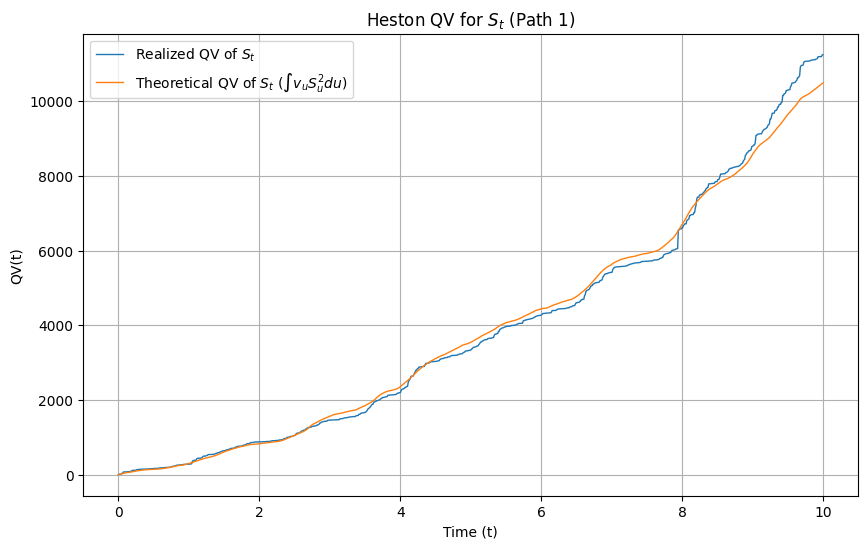


--- Section E: European Option Pricing under Heston Model (Monte Carlo) ---

Pricing European call option with K=100.0, T=10.0, r=0.03
Heston Parameters for Pricing: S0=100.0, v0=0.04, kappa=2.0, theta=0.04, xi=0.25, rho=-0.5
Monte Carlo: 50000 simulations, 252 steps per path.
  Heston MC Price for call: 37.0987 (Std Err: 0.2565)
  For rough comparison, BSM Price (with sigma=sqrt(v0)=0.200): 36.8458

--- All Demonstrations Complete ---


In [5]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, 
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess,
        HestonModel # New import
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 


print("--- Running Stochastic Process Demonstrations including Heston Model & Option Pricing ---")

T_DEMO_PROCESS = 10.0  # Time horizon for general process plots
N_DEMO_PROCESS = 1000  # Number of time points for general process plots

T_DEMO_OPTION = 10.0    # Time horizon for option pricing
N_DEMO_OPTION_MC = 50000 # Number of paths for MC option pricing
N_STEPS_OPTION_MC = 252  # Number of steps for each MC path in Heston option pricing

PATHS_DEMO_VISUAL = 3 # Number of paths to plot for visual process demos
PATH_FOR_QV_PLOT = 0 

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 
GLOBAL_SEED = 42 
PATHS_TO_PRINT_QV = 1



# --- A.8. Heston Stochastic Volatility Model ---
print("\n--- A.8. Heston Stochastic Volatility Model Path Generation ---")
heston_S0_path = 100.0
heston_v0_path = 0.04  
heston_mu_path = 0.05  # Real-world drift for path visualization
heston_kappa_path = 3.0 
heston_theta_path = 0.04 
heston_xi_path = 0.3   
heston_rho_path = -0.6 

heston_model_vis = HestonModel(S0=heston_S0_path, v0=heston_v0_path, mu=heston_mu_path, 
                               kappa=heston_kappa_path, theta=heston_theta_path, 
                               xi=heston_xi_path, rho=heston_rho_path,
                               T=T_DEMO_PROCESS, N=N_DEMO_PROCESS, paths=PATHS_DEMO_VISUAL, 
                               seed=GLOBAL_SEED + 700)

S_paths_heston_vis, V_paths_heston_vis = heston_model_vis.generate_paths()

plot_lines(heston_model_vis.t_values, [S_paths_heston_vis[i,:] for i in range(PATHS_DEMO_VISUAL)], 
           [f'Path {i+1}' for i in range(PATHS_DEMO_VISUAL)],
           title=f'Heston Model: Asset Price $S_t$ ($\\mu={heston_mu_path}$)',
           xlabel='Time (t)', ylabel='$S_t$', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.show()

plot_lines(heston_model_vis.t_values, [V_paths_heston_vis[i,:] for i in range(PATHS_DEMO_VISUAL)], 
           [f'Path {i+1}' for i in range(PATHS_DEMO_VISUAL)],
           title=f'Heston Model: Variance Process $v_t$',
           xlabel='Time (t)', ylabel='$v_t$', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.axhline(heston_theta_path, color='gray', linestyle='--', label=f'Long-run var $\\theta$={heston_theta_path}')
plt.legend()
plt.show()

# QV for Heston paths (visualized instance)
realized_qv_S_heston_vis = heston_model_vis.get_realized_quadratic_variation_S_process()
theoretical_qv_S_heston_path_dep_vis = heston_model_vis.get_path_dependent_theoretical_qv_S_process()
if PATH_FOR_QV_PLOT < PATHS_DEMO_VISUAL:
    plot_lines(heston_model_vis.t_values, 
               [realized_qv_S_heston_vis[PATH_FOR_QV_PLOT,:], 
                theoretical_qv_S_heston_path_dep_vis[PATH_FOR_QV_PLOT,:]], 
               ['Realized QV of $S_t$', 'Theoretical QV of $S_t$ ($\\int v_u S_u^2 du$)'],
               title=f'Heston QV for $S_t$ (Path {PATH_FOR_QV_PLOT+1})',
               xlabel='Time (t)', ylabel='QV(t)', figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
    plt.show()


# --- Section E: Option Pricing under Heston Model ---
print("\n--- Section E: European Option Pricing under Heston Model (Monte Carlo) ---")

# Option Parameters
opt_S0 = 100.0
opt_K = 100.0 
opt_T = T_DEMO_OPTION # Use T_DEMO_OPTION (1.0 year)
opt_r = 0.03          # Risk-free rate
opt_type = 'call'

# Heston parameters for pricing (v0, kappa, theta, xi, rho are from the model instance)
# The HestonModel for pricing will use S0=opt_S0, v0 from its init, and MU=opt_r for risk-neutral sim
# We use a distinct HestonModel instance for pricing to clearly set its S0, v0, and ensure
# its generate_paths uses the risk-free rate 'r' as the drift 'mu' for S.

heston_v0_pricing = 0.04 # (20% vol)^2
heston_kappa_pricing = 2.0
heston_theta_pricing = 0.04 # Long-run variance
heston_xi_pricing = 0.25    # Vol of vol
heston_rho_pricing = -0.5   # Correlation

# This instance is configured for Heston parameters.
# Its internal 'mu' will be overridden by 'r' in price_european_option_mc.
heston_pricer = HestonModel(S0=opt_S0, v0=heston_v0_pricing, 
                            mu=opt_r, # Pass 'r' as 'mu' initially for clarity, though it's overridden by 'r' arg in pricing method
                            kappa=heston_kappa_pricing, theta=heston_theta_pricing, 
                            xi=heston_xi_pricing, rho=heston_rho_pricing,
                            T=opt_T, N=N_STEPS_OPTION_MC, # T and N here are for one MC path
                            paths=1, # Not used by price_european_option_mc's loop directly
                            seed=GLOBAL_SEED + 800)

print(f"\nPricing European {opt_type} option with K={opt_K}, T={opt_T}, r={opt_r}")
print(f"Heston Parameters for Pricing: S0={opt_S0}, v0={heston_v0_pricing}, "
      f"kappa={heston_kappa_pricing}, theta={heston_theta_pricing}, "
      f"xi={heston_xi_pricing}, rho={heston_rho_pricing}")
print(f"Monte Carlo: {N_DEMO_OPTION_MC} simulations, {N_STEPS_OPTION_MC} steps per path.")

heston_mc_price, heston_mc_std_err = heston_pricer.price_european_option_mc(
    K=opt_K, 
    T_option=opt_T, 
    r=opt_r, 
    option_type=opt_type,
    num_simulations=N_DEMO_OPTION_MC,
    N_steps_option=N_STEPS_OPTION_MC # Explicitly pass number of steps for MC paths
)

print(f"  Heston MC Price for {opt_type}: {heston_mc_price:.4f} (Std Err: {heston_mc_std_err:.4f})")

# For comparison, a BSM price (using initial Heston vol sqrt(v0) as a proxy)
bsm_comparison_vol = np.sqrt(heston_v0_pricing)
bsm_option_compare = EuropeanOptionBSM(S0=opt_S0, K=opt_K, T=opt_T, r=opt_r, sigma=bsm_comparison_vol, option_type=opt_type)
bsm_price_compare = bsm_option_compare.price()
print(f"  For rough comparison, BSM Price (with sigma=sqrt(v0)={bsm_comparison_vol:.3f}): {bsm_price_compare:.4f}")




print("\n--- All Demonstrations Complete ---")



--- Running Stochastic Process Demonstrations including Heston Model, Option Pricing & Volatility Smile ---

--- Section F: Heston Model Implied Volatility Smile/Skew ---
Generating Heston prices for call options to create implied volatility smile:
  S0=100.0, T=1.0, r=0.03
  Heston Params: v0=0.04, kappa=3.0, theta=0.08, xi=0.4, rho=-0.1

Calculating Heston prices and BSM implied volatilities for strikes: [ 70.          74.28571429  78.57142857  82.85714286  87.14285714
  91.42857143  95.71428571 100.         104.28571429 108.57142857
 112.85714286 117.14285714 121.42857143 125.71428571 130.        ]
  Strike K=70.00: Heston Price=32.8072 -> Implied Vol=0.2686
  Strike K=74.29: Heston Price=29.1874 -> Implied Vol=0.2719
  Strike K=78.57: Heston Price=25.6100 -> Implied Vol=0.2662
  Strike K=82.86: Heston Price=22.3439 -> Implied Vol=0.2659
  Strike K=87.14: Heston Price=19.1484 -> Implied Vol=0.2595
  Strike K=91.43: Heston Price=16.4310 -> Implied Vol=0.2608
  Strike K=95.71: Heston 

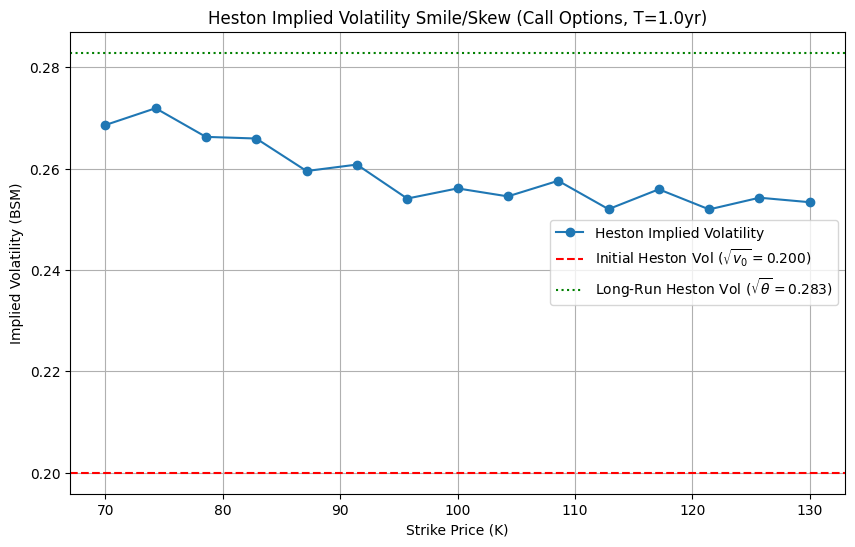


--- All Demonstrations Complete ---


In [6]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, 
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess,
        HestonModel 
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 


print("--- Running Stochastic Process Demonstrations including Heston Model, Option Pricing & Volatility Smile ---")

T_DEMO_PROCESS = 1.0  
N_DEMO_PROCESS = 253  

T_DEMO_OPTION = 1.0    
N_DEMO_OPTION_MC = 50000 # For Heston MC pricing
N_STEPS_OPTION_MC = 100  # Fewer steps for faster smile generation, but can be increased

PATHS_DEMO_VISUAL = 3 
PATH_FOR_QV_PLOT = 0 

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 
GLOBAL_SEED = 42 


# --- Section F: Heston Model and Implied Volatility Smile/Skew ---
print("\n--- Section F: Heston Model Implied Volatility Smile/Skew ---")

# Market and Option Parameters for Smile Generation
smile_S0 = 100.0
smile_T = 1.0 
smile_r = 0.03         
smile_option_type = 'call'

# Heston Parameters (these define the "true" world that generates option prices)
heston_v0_smile = 0.04    # Initial variance (20% vol)
heston_kappa_smile = 3.0  # Speed of variance reversion
heston_theta_smile = 0.08 # Long-run variance (e.g., implies ~24.5% long-run vol)
heston_xi_smile = 0.4     # Vol of vol
heston_rho_smile = -0.1   # Correlation

print(f"Generating Heston prices for {smile_option_type} options to create implied volatility smile:")
print(f"  S0={smile_S0}, T={smile_T}, r={smile_r}")
print(f"  Heston Params: v0={heston_v0_smile}, kappa={heston_kappa_smile}, theta={heston_theta_smile}, xi={heston_xi_smile}, rho={heston_rho_smile}")

# Heston model instance for pricing options across different strikes
heston_for_smile = HestonModel(
    S0=smile_S0, v0=heston_v0_smile, 
    mu=smile_r, # mu will be overridden by r in price_european_option_mc for risk-neutral pricing
    kappa=heston_kappa_smile, theta=heston_theta_smile, 
    xi=heston_xi_smile, rho=heston_rho_smile,
    T=smile_T, N=N_STEPS_OPTION_MC, # T and N for MC path simulation
    paths=1, # Not directly used by price_european_option_mc loop, but part of init
    seed=GLOBAL_SEED + 900
)

# Define a range of strike prices (or moneyness K/S0)
strike_prices = np.linspace(smile_S0 * 0.7, smile_S0 * 1.3, 15) # e.g., 70 to 130 if S0=100
implied_vols_heston = []
heston_option_prices = []

print(f"\nCalculating Heston prices and BSM implied volatilities for strikes: {strike_prices}")
for K_strike in strike_prices:
    # 1. Price option using Heston MC
    heston_price, _ = heston_for_smile.price_european_option_mc(
        K=K_strike, 
        T_option=smile_T, 
        r=smile_r, 
        option_type=smile_option_type,
        num_simulations=N_DEMO_OPTION_MC, # Use a good number of paths for accuracy
        N_steps_option=N_STEPS_OPTION_MC
    )
    heston_option_prices.append(heston_price)
    
    # 2. Calculate BSM Implied Volatility for this Heston price
    #    S0, K, T, r, option_type are for the BSM pricer to match 'market_price'
    iv = EuropeanOptionBSM.calculate_implied_volatility(
        market_price=heston_price, 
        S0=smile_S0, 
        K=K_strike, 
        T=smile_T, 
        r=smile_r, 
        option_type=smile_option_type
    )
    implied_vols_heston.append(iv)
    print(f"  Strike K={K_strike:.2f}: Heston Price={heston_price:.4f} -> Implied Vol={iv:.4f}" if iv is not np.nan else f"  Strike K={K_strike:.2f}: Heston Price={heston_price:.4f} -> Implied Vol=Not Found")

# Filter out NaNs for plotting if any IVs were not found
valid_strikes_for_plot = [K for K, iv in zip(strike_prices, implied_vols_heston) if iv is not np.nan]
valid_implied_vols_for_plot = [iv for iv in implied_vols_heston if iv is not np.nan]

# Plot the Implied Volatility Smile/Skew
plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
if valid_strikes_for_plot:
    plt.plot(valid_strikes_for_plot, valid_implied_vols_for_plot, 'o-', label='Heston Implied Volatility')
else:
    print("No valid implied volatilities found to plot.")

# For comparison, plot the initial Heston volatility sqrt(v0)
initial_heston_vol = np.sqrt(heston_v0_smile)
plt.axhline(initial_heston_vol, color='red', linestyle='--', label=f'Initial Heston Vol ($\sqrt{{v_0}} = {initial_heston_vol:.3f}$)')

# Also, maybe the long-run Heston volatility sqrt(theta)
long_run_heston_vol = np.sqrt(heston_theta_smile)
plt.axhline(long_run_heston_vol, color='green', linestyle=':', label=f'Long-Run Heston Vol ($\sqrt{{\\theta}} = {long_run_heston_vol:.3f}$)')

plt.xlabel('Strike Price (K)')
plt.ylabel('Implied Volatility (BSM)')
plt.title(f'Heston Implied Volatility Smile/Skew ({smile_option_type.capitalize()} Options, T={smile_T}yr)')
plt.legend()
plt.grid(True)
plt.show()

if len(valid_strikes_for_plot) < len(strike_prices):
    print("Warning: Some implied volatilities could not be calculated (plotted points may be fewer).")
    print("This can happen if Heston prices fall outside theoretical BSM bounds for certain strikes, or if root finder fails.")


print("\n--- All Demonstrations Complete ---")



--- Running Stochastic Process Demonstrations & Advanced MC (Antithetic & Control Variates) ---

--- Section G: Monte Carlo Enhancement Techniques ---

--- G.1. BSM European Option MC Pricing Enhancements ---
  Analytical BSMG Price (q=0.01): 9.82630
  Std BSM MC:       9.75862 (StdErr: 0.09989) [Time: 0.00s]
  AV BSM MC:        9.82629 (StdErr: 0.07136) [Time: 0.00s]
  CV BSM MC:        9.80577 (StdErr: 0.03951) [Time: 0.00s]
  AV+CV BSM MC:     9.82597 (StdErr: 0.02826) [Time: 0.00s]


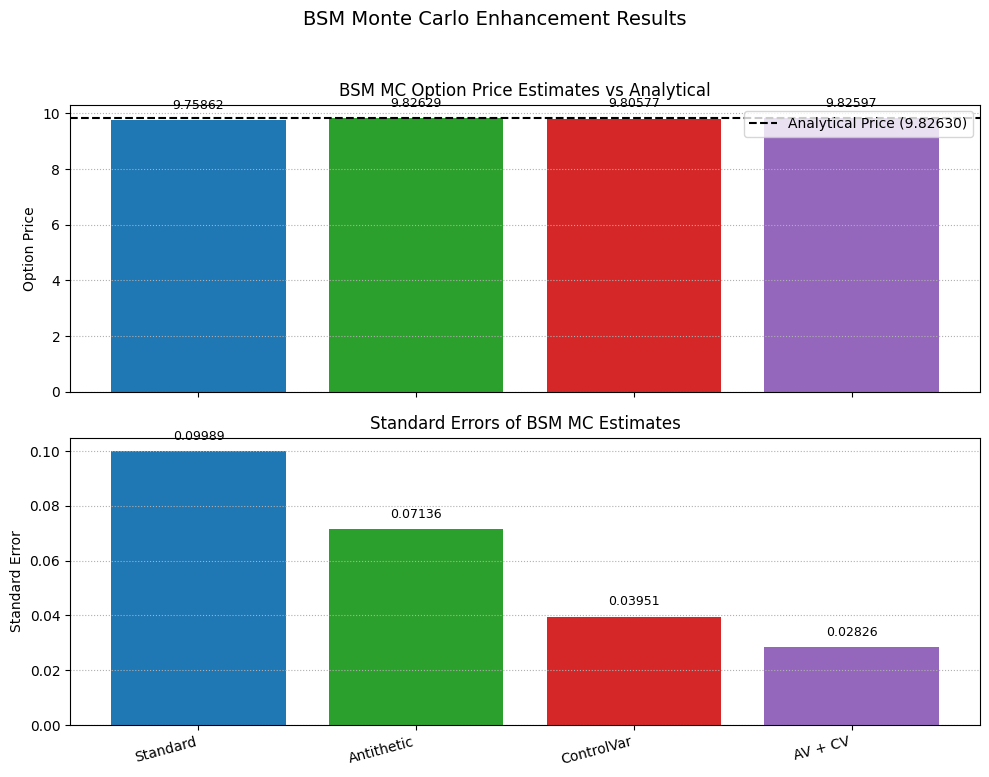


--- G.2. Heston European Option MC Pricing Enhancements ---
Pricing European call option (K=100.0, T=1.0, r=0.05, q=0.01) under Heston.
  Heston Params: S0=100.0, v0=0.04, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7
  MC simulations: 20000 (primary draws), 50 steps/path.
  Std Heston MC:    9.07755 (StdErr: 0.08110) [Time: 4.60s]
  AV Heston MC:     9.02474 (StdErr: 0.05657) [Time: 8.99s]
  CV Heston MC:     9.59662 (StdErr: 0.03951) [Time: 4.59s]
  AV+CV Heston MC:  9.60627 (StdErr: 0.02816) [Time: 9.18s]


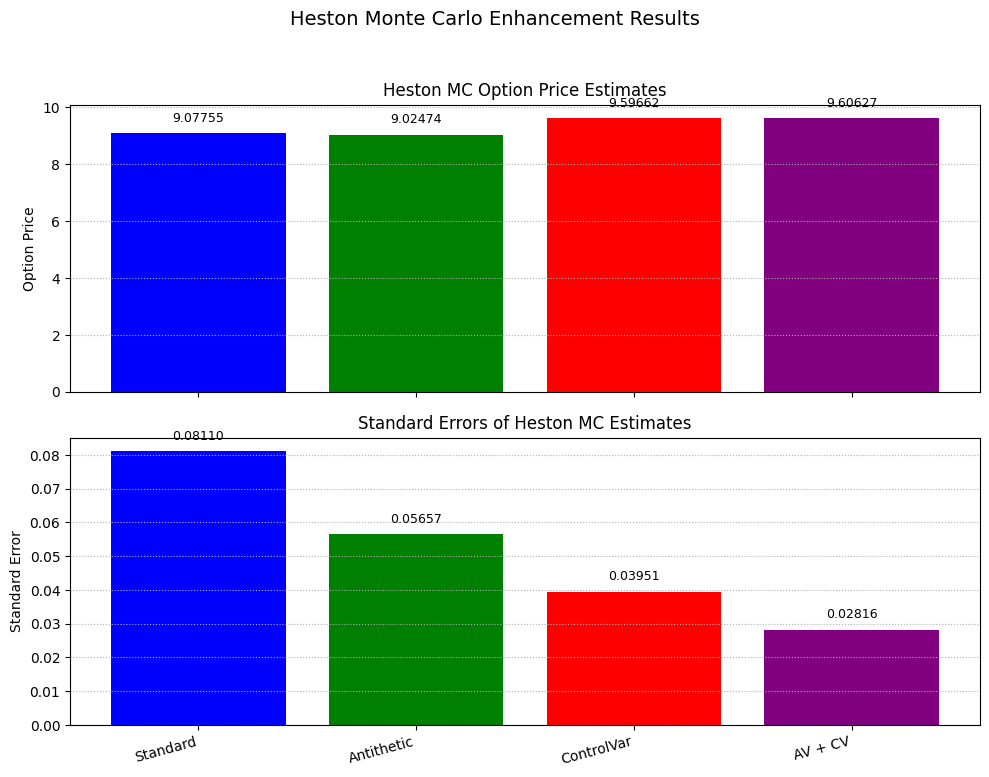


--- All Demonstrations Complete ---


In [7]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, 
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess,
        HestonModel 
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 
import time # For timing MC simulations

print("--- Running Stochastic Process Demonstrations & Advanced MC (Antithetic & Control Variates) ---")

# Standard parameters for demonstrations
T_DEMO_PROCESS = 1.0  
N_DEMO_PROCESS = 253  

T_DEMO_OPTION = 1.0    
# Reduce MC sims for faster run in example, increase for better accuracy/variance reduction demo
N_DEMO_OPTION_MC_PRIMARY = 20000 
N_STEPS_OPTION_MC = 50  

PATHS_DEMO_VISUAL = 3 
PATH_FOR_QV_PLOT = 0 

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 
GLOBAL_SEED = 42 


# --- Section G: Monte Carlo Enhancement - Antithetic & Control Variates ---
print("\n--- Section G: Monte Carlo Enhancement Techniques ---")

# G.1 BSM Option Pricing with Enhancements
print("\n--- G.1. BSM European Option MC Pricing Enhancements ---")
bsm_opt_S0 = 100.0
bsm_opt_K = 100.0 
bsm_opt_T = T_DEMO_OPTION
bsm_opt_r = 0.05
bsm_opt_q = 0.01 
bsm_opt_sigma = 0.2
bsm_opt_type = 'call'

bsm_option_for_mc = EuropeanOptionBSM(
    S0=bsm_opt_S0, K=bsm_opt_K, T=bsm_opt_T, 
    r=bsm_opt_r, sigma=bsm_opt_sigma, option_type=bsm_opt_type, dividend_yield=bsm_opt_q
)
analytical_bsm_price = bsm_option_for_mc.price()
print(f"  Analytical BSMG Price (q={bsm_opt_q}): {analytical_bsm_price:.5f}")

bsm_mc_results = {}

# Standard MC for BSM
start_time = time.time()
price, err = bsm_option_for_mc.mc_price(
    num_simulations=N_DEMO_OPTION_MC_PRIMARY, seed=GLOBAL_SEED + 1000, 
    use_antithetic=False, use_control_variate=False
)
end_time = time.time()
bsm_mc_results['Standard'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  Std BSM MC:       {price:.5f} (StdErr: {err:.5f}) [Time: {bsm_mc_results['Standard']['time']:.2f}s]")

# MC with Antithetic Variates for BSM
start_time = time.time()
price, err = bsm_option_for_mc.mc_price(
    num_simulations=N_DEMO_OPTION_MC_PRIMARY*2, seed=GLOBAL_SEED + 1000, 
    use_antithetic=True, use_control_variate=False 
) 
end_time = time.time()
bsm_mc_results['Antithetic'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  AV BSM MC:        {price:.5f} (StdErr: {err:.5f}) [Time: {bsm_mc_results['Antithetic']['time']:.2f}s]")

# MC with Control Variates for BSM
start_time = time.time()
price, err = bsm_option_for_mc.mc_price(
    num_simulations=N_DEMO_OPTION_MC_PRIMARY, seed=GLOBAL_SEED + 1001, 
    use_antithetic=False, use_control_variate=True
)
end_time = time.time()
bsm_mc_results['ControlVar'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  CV BSM MC:        {price:.5f} (StdErr: {err:.5f}) [Time: {bsm_mc_results['ControlVar']['time']:.2f}s]")

# MC with Antithetic + Control Variates for BSM
start_time = time.time()
price, err = bsm_option_for_mc.mc_price(
    num_simulations=N_DEMO_OPTION_MC_PRIMARY*2, seed=GLOBAL_SEED + 1000, 
    use_antithetic=True, use_control_variate=True
)
end_time = time.time()
bsm_mc_results['AV + CV'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  AV+CV BSM MC:     {price:.5f} (StdErr: {err:.5f}) [Time: {bsm_mc_results['AV + CV']['time']:.2f}s]")

# Plotting BSM MC Results
labels_bsm = list(bsm_mc_results.keys())
prices_bsm = [r['price'] for r in bsm_mc_results.values()]
errors_bsm = [r['std_err'] for r in bsm_mc_results.values()]
colors_bsm = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd'] # Default matplotlib colors for consistency

fig_bsm, axs_bsm = plt.subplots(2, 1, figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO * 1.3), sharex=True) # Increased height slightly

# Prices Plot
bars_prices = axs_bsm[0].bar(labels_bsm, prices_bsm, color=colors_bsm)
axs_bsm[0].axhline(analytical_bsm_price, color='black', linestyle='--', label=f'Analytical Price ({analytical_bsm_price:.5f})')
axs_bsm[0].set_ylabel('Option Price')
axs_bsm[0].set_title('BSM MC Option Price Estimates vs Analytical')

# Add text labels above bars for prices
y_min_price, y_max_price = axs_bsm[0].get_ylim()
text_offset_price = (y_max_price - y_min_price) * 0.03 # 3% of y-axis range as offset
for i, bar in enumerate(bars_prices):
    height = bar.get_height()
    axs_bsm[0].text(bar.get_x() + bar.get_width()/2., height + text_offset_price,
                    f'{height:.5f}', ha='center', va='bottom', fontsize=9)
axs_bsm[0].legend(loc='upper right') # Ensure legend includes analytical line
axs_bsm[0].grid(True, axis='y', linestyle=':')


# Standard Errors Plot
bars_errors = axs_bsm[1].bar(labels_bsm, errors_bsm, color=colors_bsm)
axs_bsm[1].set_ylabel('Standard Error')
axs_bsm[1].set_title('Standard Errors of BSM MC Estimates')

# Add text labels above bars for errors
y_min_err, y_max_err = axs_bsm[1].get_ylim()
if y_max_err == y_min_err : y_max_err += 0.01 # Avoid division by zero if all errors are same
text_offset_err = (y_max_err - y_min_err) * 0.03 # 3% of y-axis range as offset
for i, bar in enumerate(bars_errors):
    height = bar.get_height()
    axs_bsm[1].text(bar.get_x() + bar.get_width()/2., height + text_offset_err,
                    f'{height:.5f}', ha='center', va='bottom', fontsize=9)
axs_bsm[1].grid(True, axis='y', linestyle=':')
# Adding a legend for bars if colors are meant to be distinct categories (though x-labels serve this)
# For this plot, labels_bsm on x-axis are the legend. A separate color legend is usually redundant here.
# However, to explicitly add it as requested:
# axs_bsm[1].legend(bars_errors, labels_bsm, title="MC Method", loc='upper right')


plt.xticks(rotation=15, ha='right')
fig_bsm.suptitle('BSM Monte Carlo Enhancement Results', fontsize=14, y=0.99)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for subtitle
plt.show()


# G.2 Heston Option Pricing with Enhancements
print("\n--- G.2. Heston European Option MC Pricing Enhancements ---")
heston_opt_S0 = 100.0; heston_opt_v0 = 0.04; heston_opt_kappa = 2.0
heston_opt_theta = 0.04; heston_opt_xi = 0.3; heston_opt_rho = -0.7
heston_opt_r = 0.05; heston_opt_q = 0.01 

heston_pricer_enhanced = HestonModel(
    S0=heston_opt_S0, v0=heston_opt_v0, mu=heston_opt_r, 
    kappa=heston_opt_kappa, theta=heston_opt_theta, xi=heston_opt_xi, rho=heston_opt_rho,
    T=bsm_opt_T, N=N_STEPS_OPTION_MC, paths=1, seed=GLOBAL_SEED + 1100, dividend_yield=heston_opt_q
)

print(f"Pricing European {bsm_opt_type} option (K={bsm_opt_K}, T={bsm_opt_T}, r={heston_opt_r}, q={heston_opt_q}) under Heston.")
print(f"  Heston Params: S0={heston_opt_S0}, v0={heston_opt_v0}, kappa={heston_opt_kappa}, theta={heston_opt_theta}, xi={heston_opt_xi}, rho={heston_opt_rho}")
print(f"  MC simulations: {N_DEMO_OPTION_MC_PRIMARY} (primary draws), {N_STEPS_OPTION_MC} steps/path.")

heston_mc_results = {}
# Standard Heston MC
start_time = time.time()
price, err = heston_pricer_enhanced.price_european_option_mc(
    K=bsm_opt_K, T_option=bsm_opt_T, r=heston_opt_r, option_type=bsm_opt_type,
    num_simulations=N_DEMO_OPTION_MC_PRIMARY, N_steps_option=N_STEPS_OPTION_MC, 
    use_antithetic=False, use_control_variate=False
)
end_time = time.time()
heston_mc_results['Standard'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  Std Heston MC:    {price:.5f} (StdErr: {err:.5f}) [Time: {heston_mc_results['Standard']['time']:.2f}s]")

# Heston MC with Antithetic Variates
start_time = time.time()
price, err = heston_pricer_enhanced.price_european_option_mc(
    K=bsm_opt_K, T_option=bsm_opt_T, r=heston_opt_r, option_type=bsm_opt_type,
    num_simulations=N_DEMO_OPTION_MC_PRIMARY*2, N_steps_option=N_STEPS_OPTION_MC, 
    use_antithetic=True, use_control_variate=False
)
end_time = time.time()
heston_mc_results['Antithetic'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  AV Heston MC:     {price:.5f} (StdErr: {err:.5f}) [Time: {heston_mc_results['Antithetic']['time']:.2f}s]")

# Heston MC with Control Variates
start_time = time.time()
price, err = heston_pricer_enhanced.price_european_option_mc(
    K=bsm_opt_K, T_option=bsm_opt_T, r=heston_opt_r, option_type=bsm_opt_type,
    num_simulations=N_DEMO_OPTION_MC_PRIMARY, N_steps_option=N_STEPS_OPTION_MC, 
    use_antithetic=False, use_control_variate=True
)
end_time = time.time()
heston_mc_results['ControlVar'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  CV Heston MC:     {price:.5f} (StdErr: {err:.5f}) [Time: {heston_mc_results['ControlVar']['time']:.2f}s]")

# Heston MC with Antithetic + Control Variates
start_time = time.time()
price, err = heston_pricer_enhanced.price_european_option_mc(
    K=bsm_opt_K, T_option=bsm_opt_T, r=heston_opt_r, option_type=bsm_opt_type,
    num_simulations=N_DEMO_OPTION_MC_PRIMARY*2, N_steps_option=N_STEPS_OPTION_MC, 
    use_antithetic=True, use_control_variate=True
)
end_time = time.time()
heston_mc_results['AV + CV'] = {'price': price, 'std_err': err, 'time': end_time - start_time}
print(f"  AV+CV Heston MC:  {price:.5f} (StdErr: {err:.5f}) [Time: {heston_mc_results['AV + CV']['time']:.2f}s]")

# Plotting Heston MC Results
labels_heston = list(heston_mc_results.keys())
prices_heston = [r['price'] for r in heston_mc_results.values()]
errors_heston = [r['std_err'] for r in heston_mc_results.values()]
# colors_heston = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Example distinct colors
colors_heston = ['blue', 'green', 'red', 'purple']


fig_heston, axs_heston = plt.subplots(2, 1, figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO * 1.3), sharex=True) # Increased height

# Prices Plot
bars_prices_h = axs_heston[0].bar(labels_heston, prices_heston, color=colors_heston)
axs_heston[0].set_ylabel('Option Price')
axs_heston[0].set_title('Heston MC Option Price Estimates')
axs_heston[0].grid(True, axis='y', linestyle=':')
# Add text labels for Heston prices
y_min_price_h, y_max_price_h = axs_heston[0].get_ylim()
text_offset_price_h = (y_max_price_h - y_min_price_h) * 0.03
for i, bar in enumerate(bars_prices_h):
    height = bar.get_height()
    axs_heston[0].text(bar.get_x() + bar.get_width()/2., height + text_offset_price_h,
                       f'{height:.5f}', ha='center', va='bottom', fontsize=9)
# axs_heston[0].legend(bars_prices_h, labels_heston, title="MC Method", loc='upper right') # Add legend for bars


# Standard Errors Plot
bars_errors_h = axs_heston[1].bar(labels_heston, errors_heston, color=colors_heston)
axs_heston[1].set_ylabel('Standard Error')
axs_heston[1].set_title('Standard Errors of Heston MC Estimates')
axs_heston[1].grid(True, axis='y', linestyle=':')
# Add text labels for Heston errors
y_min_err_h, y_max_err_h = axs_heston[1].get_ylim()
if y_max_err_h == y_min_err_h : y_max_err_h += 0.01 # Avoid division by zero
text_offset_err_h = (y_max_err_h - y_min_err_h) * 0.03
for i, bar in enumerate(bars_errors_h):
    height = bar.get_height()
    axs_heston[1].text(bar.get_x() + bar.get_width()/2., height + text_offset_err_h,
                       f'{height:.5f}', ha='center', va='bottom', fontsize=9)
# axs_heston[1].legend(bars_errors_h, labels_heston, title="MC Method", loc='upper right')


plt.xticks(rotation=15, ha='right')
fig_heston.suptitle('Heston Monte Carlo Enhancement Results', fontsize=14, y=0.99)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


print("\n--- All Demonstrations Complete ---")



--- Running Stochastic Process Demonstrations, Advanced MC & Heston Greeks ---

--- Section H: Monte Carlo Greeks for Heston Model ---

Calculating Heston MC Greeks for call option (single point S0=100.0):
  S0=100.0, K=100.0, T=1.0, r=0.05, q=0.01
  Heston Params: v0=0.04, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7
  MC Sims for Point Greeks: 10000 (primary), Steps/Path: 50
  Heston MC Delta (at S0=100.0): 0.67186
  Heston MC Vega (dV/dv0) (at S0=100.0): 40.66802
  Heston MC Gamma (at S0=100.0): 0.01594

  For BSM Comparison at S0=100.0 (using sigma = sqrt(v0) = 0.2000):
    BSM Delta: 0.61176
    BSM Vega (dV/dsigma): 37.75929
    BSM Gamma: 0.01888

--- Plotting Heston MC Greeks vs. BSM Greeks across different S0 values ---
Calculating Greeks over S0 range (this might take a moment for 11 points)...
  Processed S0 = 80.00: Heston Delta=0.1671, BSM Delta=0.2053
  Processed S0 = 84.00: Heston Delta=0.2855, BSM Delta=0.2809
  Processed S0 = 88.00: Heston Delta=0.3791, BSM Delta=0.3636
  P

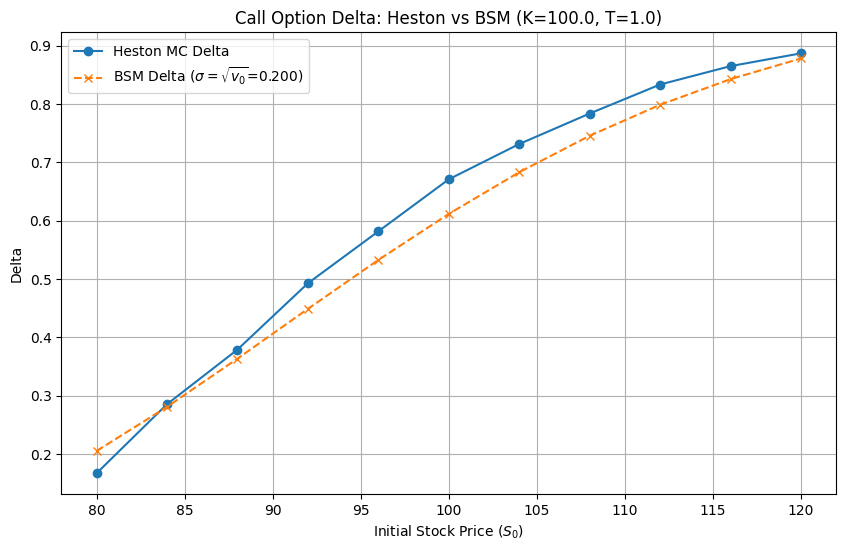

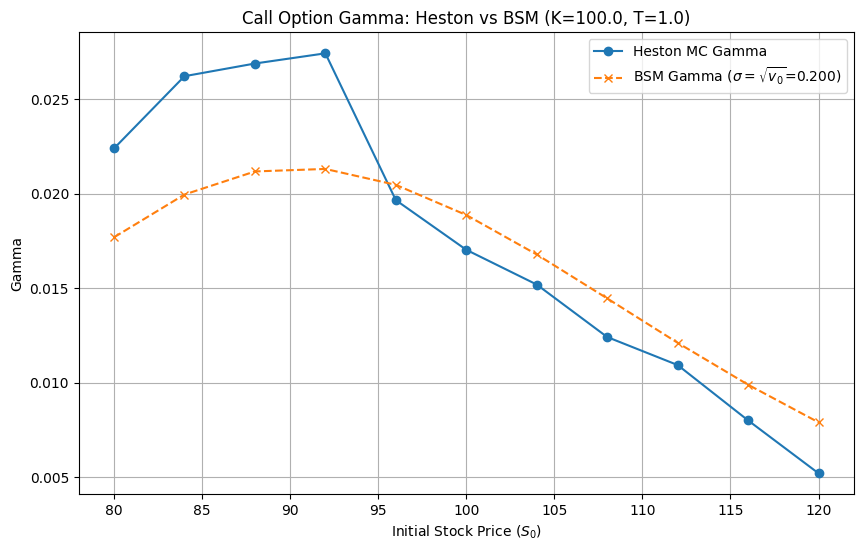

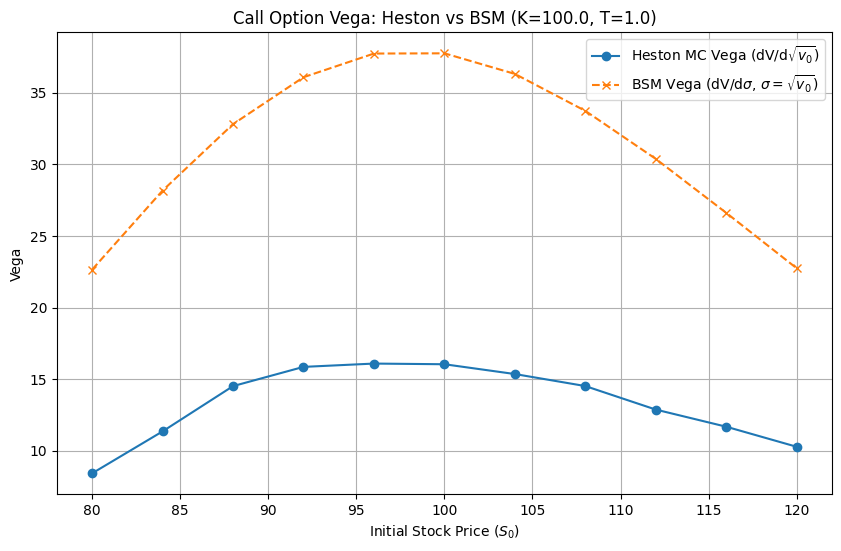


--- All Demonstrations Complete ---


In [8]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, 
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess,
        HestonModel 
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 
import time 

print("--- Running Stochastic Process Demonstrations, Advanced MC & Heston Greeks ---")

# Standard parameters
T_DEMO_OPTION = 1.0    
# Reduced MC sims for Greek plots for faster run, increase for more accuracy
N_DEMO_OPTION_MC_GREEKS_PLOT = 5000 
N_DEMO_OPTION_MC_GREEKS_POINT = 10000 # For single point estimate
N_STEPS_OPTION_MC_GREEKS = 50  

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 
GLOBAL_SEED = 42 



# --- Section H: Monte Carlo Greeks for Heston Model ---
print("\n--- Section H: Monte Carlo Greeks for Heston Model ---")

# Heston Parameters for Greek Calculation
heston_S0_center = 100.0 # Central S0 for point estimates and plots
heston_v0_greek = 0.04  
heston_K_greek = 100.0  
heston_T_greek = T_DEMO_OPTION
heston_r_greek = 0.05
heston_q_greek = 0.01
heston_option_type_greek = 'call'

heston_kappa_greek = 2.0
heston_theta_greek = 0.04 
heston_xi_greek = 0.3   
heston_rho_greek = -0.7 

# Instantiate HestonModel for point Greek calculations
heston_for_greeks_point = HestonModel(
    S0=heston_S0_center, v0=heston_v0_greek, 
    mu=heston_r_greek - heston_q_greek, 
    kappa=heston_kappa_greek, theta=heston_theta_greek, 
    xi=heston_xi_greek, rho=heston_rho_greek,
    T=heston_T_greek, N=N_STEPS_OPTION_MC_GREEKS, 
    paths=1, 
    seed=GLOBAL_SEED + 1200, 
    dividend_yield=heston_q_greek
)

print(f"\nCalculating Heston MC Greeks for {heston_option_type_greek} option (single point S0={heston_S0_center}):")
print(f"  S0={heston_S0_center}, K={heston_K_greek}, T={heston_T_greek}, r={heston_r_greek}, q={heston_q_greek}")
print(f"  Heston Params: v0={heston_v0_greek}, kappa={heston_kappa_greek}, theta={heston_theta_greek}, xi={heston_xi_greek}, rho={heston_rho_greek}")
print(f"  MC Sims for Point Greeks: {N_DEMO_OPTION_MC_GREEKS_POINT} (primary), Steps/Path: {N_STEPS_OPTION_MC_GREEKS}")

use_av_greeks = True
use_cv_greeks = True

# Point Delta
delta_heston_mc_point = heston_for_greeks_point.get_delta_mc(
    K=heston_K_greek, T_option=heston_T_greek, r=heston_r_greek, option_type=heston_option_type_greek,
    num_simulations=N_DEMO_OPTION_MC_GREEKS_POINT, N_steps_option=N_STEPS_OPTION_MC_GREEKS,
    dS_ratio=0.001, use_antithetic=use_av_greeks, use_control_variate=use_cv_greeks)
print(f"  Heston MC Delta (at S0={heston_S0_center}): {delta_heston_mc_point:.5f}")

# Point Vega (w.r.t. v0)
vega_v0_heston_mc_point = heston_for_greeks_point.get_vega_v0_mc(
    K=heston_K_greek, T_option=heston_T_greek, r=heston_r_greek, option_type=heston_option_type_greek,
    num_simulations=N_DEMO_OPTION_MC_GREEKS_POINT, N_steps_option=N_STEPS_OPTION_MC_GREEKS,
    dv0_ratio=0.01, use_antithetic=use_av_greeks, use_control_variate=use_cv_greeks)
print(f"  Heston MC Vega (dV/dv0) (at S0={heston_S0_center}): {vega_v0_heston_mc_point:.5f}")

# Point Gamma
gamma_heston_mc_point = heston_for_greeks_point.get_gamma_mc(
    K=heston_K_greek, T_option=heston_T_greek, r=heston_r_greek, option_type=heston_option_type_greek,
    num_simulations=N_DEMO_OPTION_MC_GREEKS_POINT, N_steps_option=N_STEPS_OPTION_MC_GREEKS,
    dS_ratio=0.005, use_antithetic=use_av_greeks, use_control_variate=use_cv_greeks)
print(f"  Heston MC Gamma (at S0={heston_S0_center}): {gamma_heston_mc_point:.5f}")

# BSM Comparison Point
bsm_vol_compare_greeks = np.sqrt(heston_v0_greek)
bsm_option_for_greeks_compare_point = EuropeanOptionBSM(
    S0=heston_S0_center, K=heston_K_greek, T=heston_T_greek,
    r=heston_r_greek, sigma=bsm_vol_compare_greeks, 
    option_type=heston_option_type_greek, dividend_yield=heston_q_greek)
print(f"\n  For BSM Comparison at S0={heston_S0_center} (using sigma = sqrt(v0) = {bsm_vol_compare_greeks:.4f}):")
print(f"    BSM Delta: {bsm_option_for_greeks_compare_point.delta():.5f}")
print(f"    BSM Vega (dV/dsigma): {bsm_option_for_greeks_compare_point.vega():.5f}")
print(f"    BSM Gamma: {bsm_option_for_greeks_compare_point.gamma():.5f}")


# --- Plotting Greeks vs. S0 ---
print("\n--- Plotting Heston MC Greeks vs. BSM Greeks across different S0 values ---")
S0_range = np.linspace(heston_S0_center * 0.8, heston_S0_center * 1.2, 11) # Range of S0 values

delta_heston_values = []
delta_bsm_values = []
gamma_heston_values = []
gamma_bsm_values = []
vega_heston_values_dvdsig = [] # dV/d(initial_vol)
vega_bsm_values_dvdsig = []    # dV/dsigma

print(f"Calculating Greeks over S0 range (this might take a moment for {len(S0_range)} points)...")
for s_val in S0_range:
    # Heston Greeks
    heston_inst_temp = HestonModel(
        S0=s_val, v0=heston_v0_greek, mu=heston_r_greek - heston_q_greek, 
        kappa=heston_kappa_greek, theta=heston_theta_greek, xi=heston_xi_greek, rho=heston_rho_greek,
        T=heston_T_greek, N=N_STEPS_OPTION_MC_GREEKS, paths=1, 
        seed=GLOBAL_SEED + int(s_val), # Vary seed slightly per S0 for independent MC errors
        dividend_yield=heston_q_greek)
    
    delta_h = heston_inst_temp.get_delta_mc(
        K=heston_K_greek, T_option=heston_T_greek, r=heston_r_greek, option_type=heston_option_type_greek,
        num_simulations=N_DEMO_OPTION_MC_GREEKS_PLOT, N_steps_option=N_STEPS_OPTION_MC_GREEKS,
        dS_ratio=0.001, use_antithetic=use_av_greeks, use_control_variate=use_cv_greeks)
    delta_heston_values.append(delta_h)

    gamma_h = heston_inst_temp.get_gamma_mc(
        K=heston_K_greek, T_option=heston_T_greek, r=heston_r_greek, option_type=heston_option_type_greek,
        num_simulations=N_DEMO_OPTION_MC_GREEKS_PLOT, N_steps_option=N_STEPS_OPTION_MC_GREEKS,
        dS_ratio=0.01, use_antithetic=use_av_greeks, use_control_variate=use_cv_greeks) # Larger dS for Gamma
    gamma_heston_values.append(gamma_h)
    
    vega_v0_h = heston_inst_temp.get_vega_v0_mc(
        K=heston_K_greek, T_option=heston_T_greek, r=heston_r_greek, option_type=heston_option_type_greek,
        num_simulations=N_DEMO_OPTION_MC_GREEKS_PLOT, N_steps_option=N_STEPS_OPTION_MC_GREEKS,
        dv0_ratio=0.01, use_antithetic=use_av_greeks, use_control_variate=use_cv_greeks)
    if heston_v0_greek > 0:
        vega_heston_values_dvdsig.append(vega_v0_h * (2 * np.sqrt(heston_v0_greek)))
    else:
        vega_heston_values_dvdsig.append(0.0) # Or NaN if v0 is zero

    # BSM Greeks
    bsm_temp = EuropeanOptionBSM(
        S0=s_val, K=heston_K_greek, T=heston_T_greek, r=heston_r_greek, 
        sigma=bsm_vol_compare_greeks, option_type=heston_option_type_greek, dividend_yield=heston_q_greek)
    delta_bsm_values.append(bsm_temp.delta())
    gamma_bsm_values.append(bsm_temp.gamma())
    vega_bsm_values_dvdsig.append(bsm_temp.vega())
    
    print(f"  Processed S0 = {s_val:.2f}: Heston Delta={delta_h:.4f}, BSM Delta={bsm_temp.delta():.4f}")

# Plot Delta
plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.plot(S0_range, delta_heston_values, 'o-', label='Heston MC Delta')
plt.plot(S0_range, delta_bsm_values, 'x--', label=f'BSM Delta ($\\sigma=\\sqrt{{v_0}}$={bsm_vol_compare_greeks:.3f})')
plt.xlabel('Initial Stock Price ($S_0$)')
plt.ylabel('Delta')
plt.title(f'{heston_option_type_greek.capitalize()} Option Delta: Heston vs BSM (K={heston_K_greek}, T={heston_T_greek})')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gamma
plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.plot(S0_range, gamma_heston_values, 'o-', label='Heston MC Gamma')
plt.plot(S0_range, gamma_bsm_values, 'x--', label=f'BSM Gamma ($\\sigma=\\sqrt{{v_0}}$={bsm_vol_compare_greeks:.3f})')
plt.xlabel('Initial Stock Price ($S_0$)')
plt.ylabel('Gamma')
plt.title(f'{heston_option_type_greek.capitalize()} Option Gamma: Heston vs BSM (K={heston_K_greek}, T={heston_T_greek})')
plt.legend()
plt.grid(True)
plt.show()

# Plot Vega (dV/d(initial_vol) for Heston, dV/dsigma for BSM)
plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
plt.plot(S0_range, vega_heston_values_dvdsig, 'o-', label='Heston MC Vega (dV/d$\\sqrt{v_0}$)')
plt.plot(S0_range, vega_bsm_values_dvdsig, 'x--', label=f'BSM Vega (dV/d$\\sigma$, $\\sigma=\\sqrt{{v_0}}$)')
plt.xlabel('Initial Stock Price ($S_0$)')
plt.ylabel('Vega')
plt.title(f'{heston_option_type_greek.capitalize()} Option Vega: Heston vs BSM (K={heston_K_greek}, T={heston_T_greek})')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- All Demonstrations Complete ---")



--- Running Stochastic Process Demonstrations, Advanced MC, Heston Greeks & Calibration ---

Note: Sections A-H are omitted from this script output for brevity. Focus on Heston Calibration.

--- Section I: Simplified Heston Model Calibration ---
Attempting to calibrate Heston parameters v0 and xi to match Heston-generated 'market' prices.

True Heston Parameters for 'Market' Price Generation:
  S0=100.0, K_array=[ 90. 100. 110. 115.], T_option=1.0, r=0.03, q=0.01
  True (target) Heston: v0=0.0400, kappa=2.00, theta=0.0500, xi=0.350, rho=-0.60
  (Feller condition for true params: 2*k*th = 0.2000, xi^2 = 0.1225 -> Satisfied)

Generating 'market' option prices using true Heston parameters:
  Strike K=90.00: 'Market' Price (Heston MC) = 15.27856
  Strike K=100.00: 'Market' Price (Heston MC) = 8.99003
  Strike K=110.00: 'Market' Price (Heston MC) = 4.57263
  Strike K=115.00: 'Market' Price (Heston MC) = 3.08423
  Feller-compliant upper bound for xi (given fixed kappa, theta): 0.44721

--- C

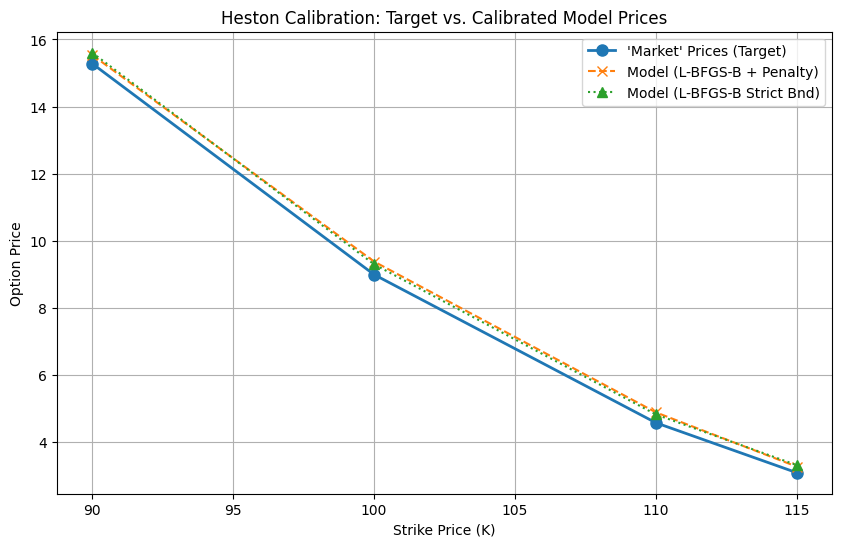


--- All Demonstrations (including Heston Calibration Refinements) Complete ---


In [10]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, 
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess,
        HestonModel 
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator
    from financial_toolkit.calibration.heston_calibration import calibrate_heston_params 
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm 
import time 

print("--- Running Stochastic Process Demonstrations, Advanced MC, Heston Greeks & Calibration ---")

FIG_WIDTH_DEMO = 10 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.6) 
GLOBAL_SEED = 42 


# --- Section I: Simplified Heston Model Calibration ---
print("\n--- Section I: Simplified Heston Model Calibration ---")
print("Attempting to calibrate Heston parameters v0 and xi to match Heston-generated 'market' prices.")

# 1. Define "True" Heston Parameters to generate market prices
true_S0_cal = 100.0
true_v0_cal = 0.04  
true_K_cal_array = np.array([90.0, 100.0, 110.0, 115.0]) 
true_T_cal_option = 1.0 
true_r_cal = 0.03
true_q_cal = 0.01
true_option_type_cal = 'call'

# These Heston parameters are assumed KNOWN and FIXED during this simplified calibration
true_kappa_cal = 2.0
true_theta_cal = 0.05 
true_xi_cal = 0.35   # Target for xi calibration
true_rho_cal = -0.6

N_MC_MARKET_PRICE_GEN = 20000 
N_STEPS_MARKET_PRICE_GEN = 100 

print(f"\nTrue Heston Parameters for 'Market' Price Generation:")
print(f"  S0={true_S0_cal}, K_array={true_K_cal_array}, T_option={true_T_cal_option}, r={true_r_cal}, q={true_q_cal}")
print(f"  True (target) Heston: v0={true_v0_cal:.4f}, kappa={true_kappa_cal:.2f}, theta={true_theta_cal:.4f}, xi={true_xi_cal:.3f}, rho={true_rho_cal:.2f}")
feller_check_true = 2 * true_kappa_cal * true_theta_cal - true_xi_cal**2
print(f"  (Feller condition for true params: 2*k*th = {2*true_kappa_cal*true_theta_cal:.4f}, xi^2 = {true_xi_cal**2:.4f} -> {'Satisfied' if feller_check_true >=0 else 'VIOLATED'})")


true_heston_model_for_targets = HestonModel(
    S0=true_S0_cal, v0=true_v0_cal, mu=true_r_cal - true_q_cal, 
    kappa=true_kappa_cal, theta=true_theta_cal, xi=true_xi_cal, rho=true_rho_cal,
    T=true_T_cal_option, N=N_STEPS_MARKET_PRICE_GEN, paths=1, 
    seed=GLOBAL_SEED + 1300, dividend_yield=true_q_cal
)

market_prices_cal = []
print("\nGenerating 'market' option prices using true Heston parameters:")
for K_val in true_K_cal_array:
    price, _ = true_heston_model_for_targets.price_european_option_mc(
        K=K_val, T_option=true_T_cal_option, r=true_r_cal, option_type=true_option_type_cal,
        num_simulations=N_MC_MARKET_PRICE_GEN, N_steps_option=N_STEPS_MARKET_PRICE_GEN,
        use_antithetic=True, use_control_variate=True 
    )
    market_prices_cal.append(price)
    print(f"  Strike K={K_val:.2f}: 'Market' Price (Heston MC) = {price:.5f}")
market_prices_cal = np.array(market_prices_cal)

# 3. Calibration Setup
params_to_calibrate_list = ["v0", "xi"] 

initial_guess_cal = {"v0": 0.05, "xi": 0.5} # Initial guess might violate Feller

fixed_heston_params_for_cal = { 
    "kappa": true_kappa_cal, "theta": true_theta_cal, "rho": true_rho_cal
}

# Original bounds (allowing Feller violation for xi)
param_bounds_cal_original = {"v0": (1e-4, 0.2), "xi": (1e-4, 0.8)}

# Calculate Feller-compliant upper bound for xi
xi_feller_upper_bound = np.sqrt(2 * fixed_heston_params_for_cal["kappa"] * fixed_heston_params_for_cal["theta"])
print(f"  Feller-compliant upper bound for xi (given fixed kappa, theta): {xi_feller_upper_bound:.5f}")

# Bounds strictly enforcing Feller for xi
param_bounds_cal_feller_strict = {
    "v0": (1e-4, 0.2), 
    "xi": (1e-4, xi_feller_upper_bound - 1e-5) # ensure it's slightly less to avoid edge float issues
}


N_MC_CALIBRATION_LOOP = 4000  
N_STEPS_CALIBRATION_LOOP = 40 
feller_penalty_val = 10.0 

# --- Run Calibration with L-BFGS-B (original bounds, with Feller penalty) ---
print("\n--- Calibrating with L-BFGS-B (Original Bounds, Feller Penalty={feller_penalty_val}) ---")
calibration_result_lbfgsb_penalty = calibrate_heston_params(
    market_prices=market_prices_cal, S0=true_S0_cal, K_array=true_K_cal_array, 
    T_option=true_T_cal_option, r=true_r_cal, q=true_q_cal, option_type=true_option_type_cal,
    initial_guesses_dict=initial_guess_cal, params_to_calibrate_names=params_to_calibrate_list,
    fixed_heston_params_dict_base=fixed_heston_params_for_cal, param_bounds_dict=param_bounds_cal_original,
    N_mc_calibration=N_MC_CALIBRATION_LOOP, N_steps_calibration=N_STEPS_CALIBRATION_LOOP,
    base_seed=GLOBAL_SEED, optimizer_choice='L-BFGS-B',
    optimizer_options={'disp': True, 'maxiter': 40, 'ftol': 1e-7, 'eps': 1e-5},
    feller_penalty_factor=feller_penalty_val 
)
calibrated_params_lbfgsb_penalty_dict = {}
if calibration_result_lbfgsb_penalty.success:
    calibrated_params_lbfgsb_penalty_dict = dict(zip(params_to_calibrate_list, calibration_result_lbfgsb_penalty.x))
    print(f"  L-BFGS-B (Penalty) Calibrated: {calibrated_params_lbfgsb_penalty_dict}, Error: {calibration_result_lbfgsb_penalty.fun:.6e}")
    kappa_eff = fixed_heston_params_for_cal['kappa']; theta_eff = fixed_heston_params_for_cal['theta']
    xi_cal_lbfgsb = calibrated_params_lbfgsb_penalty_dict.get('xi', 0)
    feller_val_lbfgsb = 2*kappa_eff*theta_eff - xi_cal_lbfgsb**2
    print(f"    Feller check for L-BFGS-B: 2*k*th={2*kappa_eff*theta_eff:.4f}, xi_cal^2={xi_cal_lbfgsb**2:.4f} -> {'Satisfied' if feller_val_lbfgsb >= -1e-6 else 'VIOLATED'} (value: {feller_val_lbfgsb:.4e})")
else: print("  L-BFGS-B (Penalty) Calibration Failed.")

# --- Run Calibration with L-BFGS-B (Feller-Strict Bounds, no penalty needed) ---
print(f"\n--- Calibrating with L-BFGS-B (Feller-Strict Bounds for xi <= {param_bounds_cal_feller_strict['xi'][1]:.4f}) ---")
calibration_result_lbfgsb_strict = calibrate_heston_params(
    market_prices=market_prices_cal, S0=true_S0_cal, K_array=true_K_cal_array, 
    T_option=true_T_cal_option, r=true_r_cal, q=true_q_cal, option_type=true_option_type_cal,
    initial_guesses_dict={"v0": initial_guess_cal["v0"], "xi": min(initial_guess_cal["xi"], param_bounds_cal_feller_strict['xi'][1])}, # Adjust initial xi if > bound
    params_to_calibrate_names=params_to_calibrate_list,
    fixed_heston_params_dict_base=fixed_heston_params_for_cal, param_bounds_dict=param_bounds_cal_feller_strict,
    N_mc_calibration=N_MC_CALIBRATION_LOOP, N_steps_calibration=N_STEPS_CALIBRATION_LOOP,
    base_seed=GLOBAL_SEED, optimizer_choice='L-BFGS-B',
    optimizer_options={'disp': True, 'maxiter': 40, 'ftol': 1e-7, 'eps': 1e-5},
    feller_penalty_factor=0.0 # No penalty needed as bounds enforce it
)
calibrated_params_lbfgsb_strict_dict = {}
if calibration_result_lbfgsb_strict.success:
    calibrated_params_lbfgsb_strict_dict = dict(zip(params_to_calibrate_list, calibration_result_lbfgsb_strict.x))
    print(f"  L-BFGS-B (Strict Bounds) Calibrated: {calibrated_params_lbfgsb_strict_dict}, Error: {calibration_result_lbfgsb_strict.fun:.6e}")
    kappa_eff = fixed_heston_params_for_cal['kappa']; theta_eff = fixed_heston_params_for_cal['theta']
    xi_cal_lbfgsb_s = calibrated_params_lbfgsb_strict_dict.get('xi', 0)
    feller_val_lbfgsb_s = 2*kappa_eff*theta_eff - xi_cal_lbfgsb_s**2
    print(f"    Feller check for L-BFGS-B (Strict): 2*k*th={2*kappa_eff*theta_eff:.4f}, xi_cal^2={xi_cal_lbfgsb_s**2:.4f} -> {'Satisfied' if feller_val_lbfgsb_s >= -1e-6 else 'VIOLATED'} (value: {feller_val_lbfgsb_s:.4e})")
else: print("  L-BFGS-B (Strict Bounds) Calibration Failed.")


# --- Optional: Run Calibration with Differential Evolution (with Feller penalty) ---
# This can be very time-consuming with MC-based objective
run_de_calibration = False # Set to True to run this part
calibrated_params_de_penalty_dict = {}
if run_de_calibration:
    print("\n--- Calibrating with Differential Evolution (Original Bounds, Feller Penalty) ---")
    de_optimizer_options = {'maxiter': 10, 'popsize': 8, 'tol': 1e-3, 'disp': True, 'polish': False, 'workers': 1}
    calibration_result_de_penalty = calibrate_heston_params(
        market_prices=market_prices_cal, S0=true_S0_cal, K_array=true_K_cal_array, 
        T_option=true_T_cal_option, r=true_r_cal, q=true_q_cal, option_type=true_option_type_cal,
        initial_guesses_dict=initial_guess_cal, params_to_calibrate_names=params_to_calibrate_list,
        fixed_heston_params_dict_base=fixed_heston_params_for_cal, param_bounds_dict=param_bounds_cal_original,
        N_mc_calibration=N_MC_CALIBRATION_LOOP // 2, N_steps_calibration=N_STEPS_CALIBRATION_LOOP // 2, # Further reduce for DE speed
        base_seed=GLOBAL_SEED, optimizer_choice='differential_evolution',
        optimizer_options=de_optimizer_options, feller_penalty_factor=feller_penalty_val)
    if calibration_result_de_penalty.success:
        calibrated_params_de_penalty_dict = dict(zip(params_to_calibrate_list, calibration_result_de_penalty.x))
        print(f"  DE (Penalty) Calibrated: {calibrated_params_de_penalty_dict}, Error: {calibration_result_de_penalty.fun:.6e}")
        # Feller check
        kappa_eff_de = fixed_heston_params_for_cal['kappa']; theta_eff_de = fixed_heston_params_for_cal['theta']
        xi_cal_de = calibrated_params_de_penalty_dict.get('xi', 0)
        feller_val_de = 2*kappa_eff_de*theta_eff_de - xi_cal_de**2
        print(f"    Feller check for DE: 2*k*th={2*kappa_eff_de*theta_eff_de:.4f}, xi_cal^2={xi_cal_de**2:.4f} -> {'Satisfied' if feller_val_de >= -1e-6 else 'VIOLATED'} (value: {feller_val_de:.4e})")
    else: print("  Differential Evolution (Penalty) Calibration Failed.")

# --- Final Comparison Plot ---
plot_data_collected = False
calibrated_model_prices_plot_lbfgsb_pen = []
calibrated_model_prices_plot_lbfgsb_str = []
calibrated_model_prices_plot_de_pen = []

if calibration_result_lbfgsb_penalty.success:
    final_cal_params = fixed_heston_params_for_cal.copy(); final_cal_params.update(calibrated_params_lbfgsb_penalty_dict)
    model = HestonModel(S0=true_S0_cal, v0=final_cal_params["v0"], mu=true_r_cal-true_q_cal, kappa=final_cal_params["kappa"], theta=final_cal_params["theta"], xi=final_cal_params["xi"], rho=final_cal_params["rho"], T=true_T_cal_option, N=N_STEPS_MARKET_PRICE_GEN, seed=GLOBAL_SEED+10, dividend_yield=true_q_cal)
    for K_val in true_K_cal_array:
        price, _ = model.price_european_option_mc(K=K_val, T_option=true_T_cal_option, r=true_r_cal,option_type=true_option_type_cal,num_simulations=N_MC_MARKET_PRICE_GEN,N_steps_option=N_STEPS_MARKET_PRICE_GEN,use_antithetic=True,use_control_variate=True)
        calibrated_model_prices_plot_lbfgsb_pen.append(price)
    plot_data_collected = True
    
if calibration_result_lbfgsb_strict.success:
    final_cal_params = fixed_heston_params_for_cal.copy(); final_cal_params.update(calibrated_params_lbfgsb_strict_dict)
    model = HestonModel(S0=true_S0_cal, v0=final_cal_params["v0"], mu=true_r_cal-true_q_cal, kappa=final_cal_params["kappa"], theta=final_cal_params["theta"], xi=final_cal_params["xi"], rho=final_cal_params["rho"], T=true_T_cal_option, N=N_STEPS_MARKET_PRICE_GEN, seed=GLOBAL_SEED+11, dividend_yield=true_q_cal)
    for K_val in true_K_cal_array:
        price, _ = model.price_european_option_mc(K=K_val, T_option=true_T_cal_option, r=true_r_cal,option_type=true_option_type_cal,num_simulations=N_MC_MARKET_PRICE_GEN,N_steps_option=N_STEPS_MARKET_PRICE_GEN,use_antithetic=True,use_control_variate=True)
        calibrated_model_prices_plot_lbfgsb_str.append(price)
    plot_data_collected = True
    
if run_de_calibration and calibration_result_de_penalty.success:
    final_cal_params = fixed_heston_params_for_cal.copy(); final_cal_params.update(calibrated_params_de_penalty_dict)
    model = HestonModel(S0=true_S0_cal, v0=final_cal_params["v0"], mu=true_r_cal-true_q_cal, kappa=final_cal_params["kappa"], theta=final_cal_params["theta"], xi=final_cal_params["xi"], rho=final_cal_params["rho"], T=true_T_cal_option, N=N_STEPS_MARKET_PRICE_GEN, seed=GLOBAL_SEED+12, dividend_yield=true_q_cal)
    for K_val in true_K_cal_array:
        price, _ = model.price_european_option_mc(K=K_val, T_option=true_T_cal_option, r=true_r_cal,option_type=true_option_type_cal,num_simulations=N_MC_MARKET_PRICE_GEN,N_steps_option=N_STEPS_MARKET_PRICE_GEN,use_antithetic=True,use_control_variate=True)
        calibrated_model_prices_plot_de_pen.append(price)
    plot_data_collected = True

if plot_data_collected:
    print("\nPlotting comparison of calibrated model prices...")
    plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
    plt.plot(true_K_cal_array, market_prices_cal, 'o-',lw=2, markersize=8, label="'Market' Prices (Target)")
    if calibrated_model_prices_plot_lbfgsb_pen:
        plt.plot(true_K_cal_array, calibrated_model_prices_plot_lbfgsb_pen, 'x--',lw=1.5, markersize=7, label="Model (L-BFGS-B + Penalty)")
    if calibrated_model_prices_plot_lbfgsb_str:
        plt.plot(true_K_cal_array, calibrated_model_prices_plot_lbfgsb_str, '^:',lw=1.5, markersize=7, label="Model (L-BFGS-B Strict Bnd)")
    if calibrated_model_prices_plot_de_pen:
        plt.plot(true_K_cal_array, calibrated_model_prices_plot_de_pen, 's-.',lw=1.5, markersize=7, label="Model (DE + Penalty)")
    plt.xlabel("Strike Price (K)")
    plt.ylabel("Option Price")
    plt.title("Heston Calibration: Target vs. Calibrated Model Prices")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nNo successful calibration results to plot for comparison.")

print("\n--- All Demonstrations Complete ---")



--- Running Financial Toolkit Demonstrations ---

Note: Sections A-I are omitted for brevity. Focus on Real-World Data Application with Out-of-Sample Test.

--- Section J: Real-World Data Application (Out-of-Sample Test) ---

--- J.1. Fetching Historical Stock Data ---
Fetching data for MSFT from 2022-06-05 to 2025-06-05...
Successfully fetched 752 data points for MSFT.
  In-sample period: 2022-06-06 to 2024-12-05 (630 days)
  Out-of-sample period: 2024-12-06 to 2025-06-04 (122 days)

--- J.2. Parameter Estimation on In-Sample Data for MSFT ---
  S0 for simulation (end of in-sample): 440.92 on 2024-12-05
  In-sample Annualized Historical Drift: 0.2084
  In-sample Annualized Historical Vol: 0.2629
  In-sample GARCH Avg Annualized Forecasted Vol (for OOS period): 0.1835

--- J.3. Simulating Paths for Out-of-Sample Period ---

--- J.4. Plotting Historical, Actual OOS, and Sample Simulated Paths ---


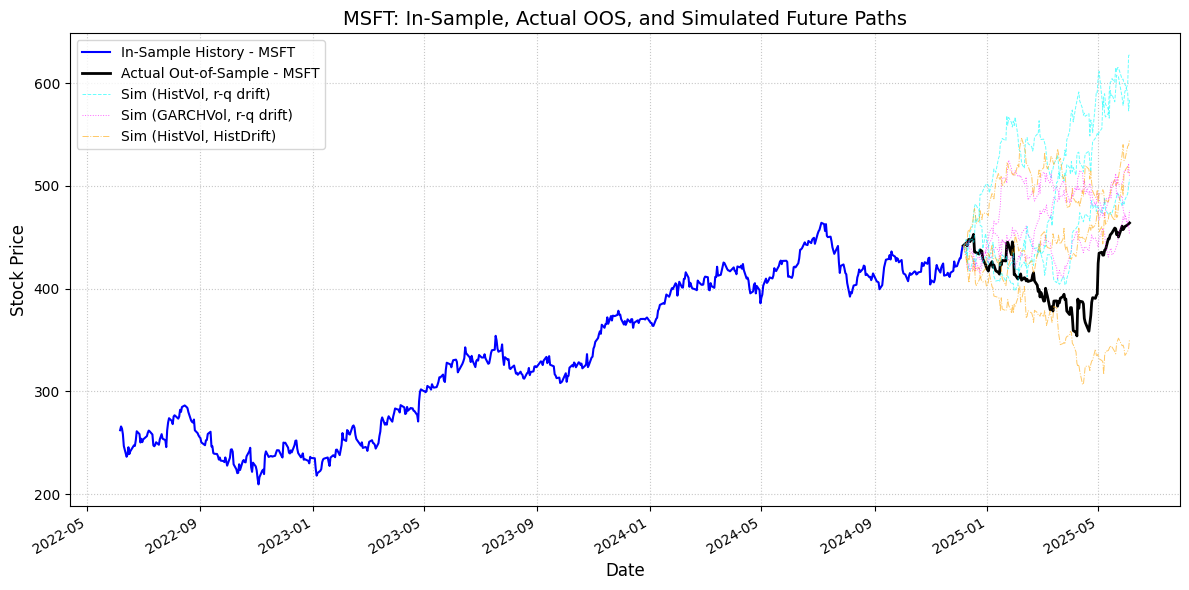


--- J.5. Distributional Comparison & Volatility Forecast Evaluation ---
  Actual Terminal Price (end of OOS period): 463.87

  Volatility Comparison for OOS Period:
    In-Sample Historical Vol used for Sim: 0.2629
    In-Sample GARCH Forecasted Vol used for Sim: 0.1835
    Actual Realized Vol during OOS Period: 0.3002
  Actual OOS end price was at 61.2th percentile of (HistVol, r-q drift) sim.
  Actual OOS end price was at 64.4th percentile of (GARCHVol, r-q drift) sim.
  Actual OOS end price was at 42.3th percentile of (HistVol, HistDrift) sim.


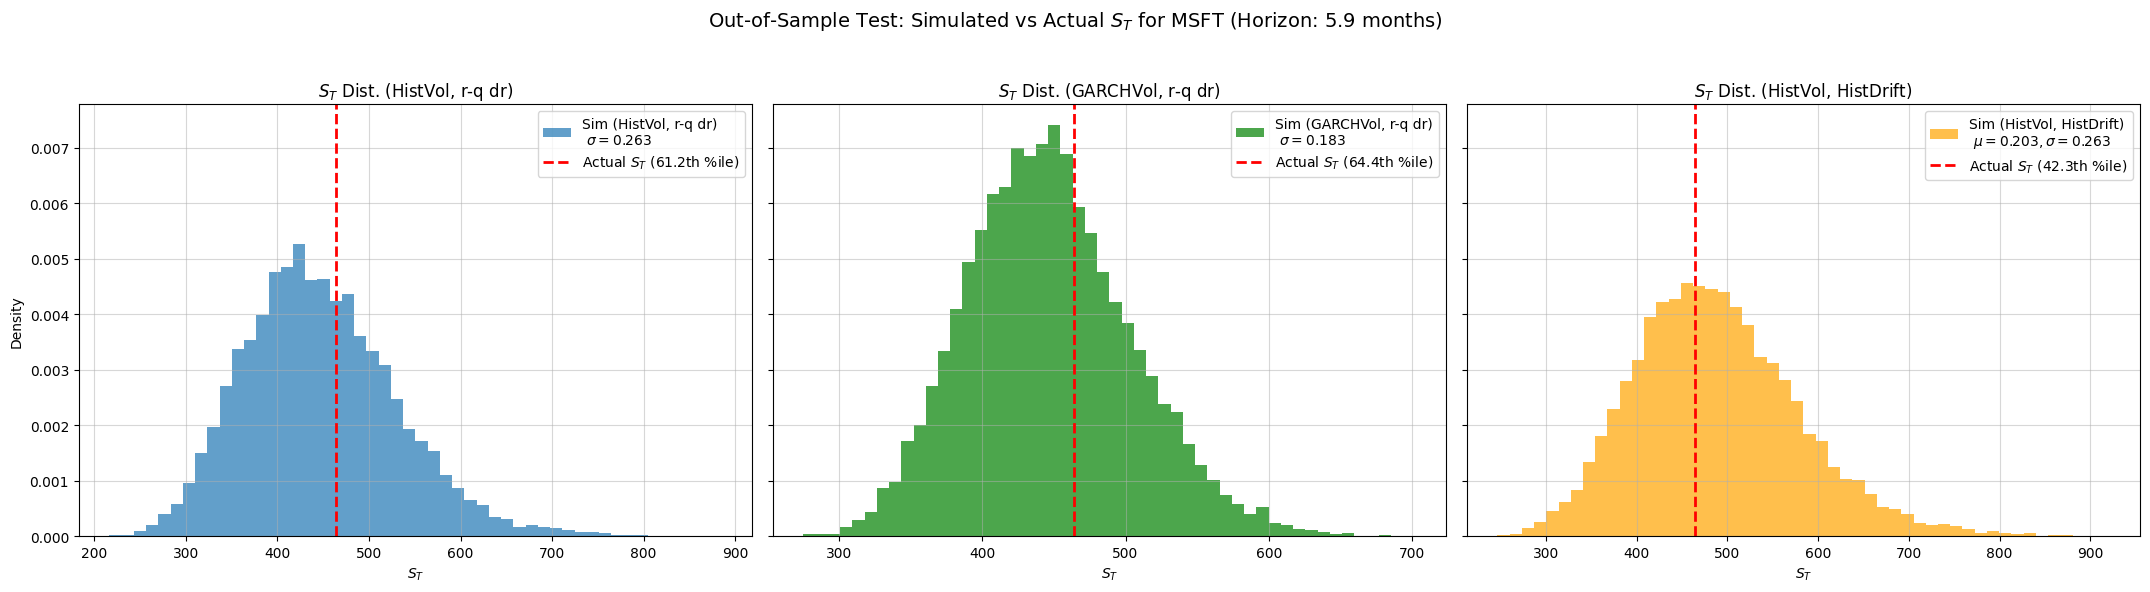


--- All Demonstrations (including Out-of-Sample Test Enhancements) Complete ---


In [12]:
import sys
import os
try:
    from financial_toolkit.stochastic_processes.brownian_motion import BrownianMotion
    from financial_toolkit.stochastic_processes.ito_processes import (
        ArithmeticBrownianMotion,
        GeometricBrownianMotion, 
        OrnsteinUhlenbeckProcess,
        CoxIngersollRossProcess,
        HestonModel 
    )
    from financial_toolkit.numerical_methods.stochastic_integrals import StochasticIntegralApproximator
    from financial_toolkit.options.bsm_model import EuropeanOptionBSM, DeltaHedgingSimulator
    from financial_toolkit.calibration.heston_calibration import calibrate_heston_params 
    from financial_toolkit.data_services.market_data import (
        get_historical_stock_data, 
        calculate_historical_volatility,
        calculate_historical_correlation_matrix,
        fit_garch_and_forecast_volatility 
    )
    from financial_toolkit.utils.plotting import plot_lines, plot_histogram_with_pdf
except ImportError as e:
    print(f"ImportError: {e}. Please ensure 'financial_toolkit' is in your Python path "
          "or adjust sys.path settings in this script if run directly.")
    raise 

import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm, percentileofscore 
import pandas as pd 
import time 

print("--- Running Financial Toolkit Demonstrations ---")

FIG_WIDTH_DEMO = 12 
FIG_HEIGHT_DEMO = FIG_WIDTH_DEMO * (0.5) 
GLOBAL_SEED = 42 



# --- Section J: Real-World Data Application with Out-of-Sample Test ---
print("\n--- Section J: Real-World Data Application (Out-of-Sample Test) ---")

# J.1 Fetch Historical Data
print("\n--- J.1. Fetching Historical Stock Data ---")
ticker_j_oos = "MSFT" 

oos_period_months = 6
total_hist_years = 3 # Total data to fetch (includes in-sample for param estimation)

end_date_total_j = pd.Timestamp.today().normalize() 
start_date_total_j = (end_date_total_j - pd.DateOffset(years=total_hist_years)).strftime("%Y-%m-%d")
# Define end of in-sample period for parameter estimation
end_date_in_sample_j = (end_date_total_j - pd.DateOffset(months=oos_period_months)).strftime("%Y-%m-%d")

print(f"Fetching data for {ticker_j_oos} from {start_date_total_j} to {end_date_total_j.strftime('%Y-%m-%d')}...")
full_stock_data_j = get_historical_stock_data(ticker_j_oos, start_date_total_j, end_date_total_j.strftime('%Y-%m-%d'))

if full_stock_data_j is not None and not full_stock_data_j.empty:
    print(f"Successfully fetched {len(full_stock_data_j)} data points for {ticker_j_oos}.")

    in_sample_data_j = full_stock_data_j.loc[:end_date_in_sample_j]
    # Determine actual start of out-of-sample data (next trading day after in-sample ends)
    actual_start_oos_date_series = full_stock_data_j.index[full_stock_data_j.index > pd.Timestamp(end_date_in_sample_j)]
    if not actual_start_oos_date_series.empty:
        actual_start_oos_date = actual_start_oos_date_series.min()
        out_of_sample_data_j = full_stock_data_j.loc[actual_start_oos_date:]
    else:
        out_of_sample_data_j = pd.DataFrame() # Empty if no dates after in-sample end

    if in_sample_data_j.empty or out_of_sample_data_j.empty:
        print("Error: Could not split data into sufficient in-sample and out-of-sample periods.")
    else:
        print(f"  In-sample period: {in_sample_data_j.index.min().strftime('%Y-%m-%d')} to {in_sample_data_j.index.max().strftime('%Y-%m-%d')} ({len(in_sample_data_j)} days)")
        print(f"  Out-of-sample period: {out_of_sample_data_j.index.min().strftime('%Y-%m-%d')} to {out_of_sample_data_j.index.max().strftime('%Y-%m-%d')} ({len(out_of_sample_data_j)} days)")

        # J.2 Parameter Estimation on In-Sample Data
        print(f"\n--- J.2. Parameter Estimation on In-Sample Data for {ticker_j_oos} ---")
        
        in_sample_prices_j = pd.Series(dtype=float) 
        if 'Close' in in_sample_data_j.columns:
            temp_series = in_sample_data_j['Close'].squeeze()
            if isinstance(temp_series, pd.Series): in_sample_prices_j = temp_series.dropna() 
            else: print("Warning: Squeezed 'Close' column from in-sample data is not a Series.")
        else: print("Error: 'Close' column not found in in_sample_data_j.")

        S0_for_sim_j = np.nan # S0 at the START of the OOS period
        hist_drift_in_sample_j = np.nan # Historical drift
        
        if not in_sample_prices_j.empty:
            S0_for_sim_j = float(in_sample_prices_j.iloc[-1]) 
            print(f"  S0 for simulation (end of in-sample): {S0_for_sim_j:.2f} on {in_sample_prices_j.index[-1].strftime('%Y-%m-%d')}")

            # Calculate historical drift (annualized mean of log returns)
            log_returns_in_sample = np.log(in_sample_prices_j / in_sample_prices_j.shift(1)).dropna()
            if len(log_returns_in_sample) > 1:
                mean_daily_log_return = log_returns_in_sample.mean()
                hist_drift_in_sample_j = mean_daily_log_return * 252 # Annualize
                print(f"  In-sample Annualized Historical Drift: {hist_drift_in_sample_j:.4f}")
            else:
                hist_drift_in_sample_j = 0.0; print("  Not enough data for historical drift, using 0.0.")


            hist_vol_in_sample_j = calculate_historical_volatility(in_sample_prices_j, window=252)
            if not np.isnan(hist_vol_in_sample_j):
                print(f"  In-sample Annualized Historical Vol: {hist_vol_in_sample_j:.4f}")
            else:
                hist_vol_in_sample_j = 0.25; print("  Using default historical vol (0.25).")

            # T_oos_years is the actual length of the OOS period in years
            # N_steps_oos_sim is the number of trading days in OOS period
            T_oos_years = (out_of_sample_data_j.index.max() - out_of_sample_data_j.index.min()).days / 365.25 # Approx years
            if T_oos_years <=0 : T_oos_years = (len(out_of_sample_data_j) / 252.0) if len(out_of_sample_data_j) > 0 else 0.1 # Fallback

            oos_forecast_days = len(out_of_sample_data_j) 

            garch_vol_in_sample_j = fit_garch_and_forecast_volatility(
                in_sample_prices_j, forecast_horizon_days=oos_forecast_days
            )
            if not np.isnan(garch_vol_in_sample_j):
                print(f"  In-sample GARCH Avg Annualized Forecasted Vol (for OOS period): {garch_vol_in_sample_j:.4f}")
            else:
                garch_vol_in_sample_j = hist_vol_in_sample_j; print("  Using historical vol as GARCH fallback.")
        else:
            print("  Not enough in-sample data to estimate parameters. Using defaults.")
            S0_for_sim_j = 100.0; hist_vol_in_sample_j = 0.25; garch_vol_in_sample_j = 0.25; hist_drift_in_sample_j = 0.0
            T_oos_years = oos_period_months / 12.0


        # J.3 Simulate Paths for Out-of-Sample Period
        print("\n--- J.3. Simulating Paths for Out-of-Sample Period ---")
        N_paths_oos_sim = 10000 
        N_paths_oos_plot = 3 # Reduced for clarity on path plot   
        N_steps_oos_sim = len(out_of_sample_data_j) # Number of steps matching OOS period length
        if N_steps_oos_sim < 2: N_steps_oos_sim = 2 # GBM requires at least 2 points (start and end)

        r_oos_j = 0.03 # Assumed risk-free rate for some drift scenarios
        q_oos_j = 0.005 # Assumed dividend yield for some drift scenarios

        sim_paths_hist_vol_rn_drift = np.array([]) 
        sim_paths_garch_vol_rn_drift = np.array([])
        sim_paths_hist_vol_hist_drift = np.array([])

        if np.isnan(S0_for_sim_j): 
            print("  Cannot simulate paths as S0 for simulation is NaN.")
        else:
            # Sim 1: Risk-Neutral Drift (r-q), Historical Vol
            gbm_hist_vol_rn = GeometricBrownianMotion(
                S0=S0_for_sim_j, mu=r_oos_j - q_oos_j, sigma=hist_vol_in_sample_j,
                T=T_oos_years, N=N_steps_oos_sim, paths=N_paths_oos_sim, seed=GLOBAL_SEED + 1600)
            sim_paths_hist_vol_rn_drift = gbm_hist_vol_rn.generate_paths()

            # Sim 2: Risk-Neutral Drift (r-q), GARCH Vol
            gbm_garch_vol_rn = GeometricBrownianMotion(
                S0=S0_for_sim_j, mu=r_oos_j - q_oos_j, sigma=garch_vol_in_sample_j,
                T=T_oos_years, N=N_steps_oos_sim, paths=N_paths_oos_sim, seed=GLOBAL_SEED + 1601)
            sim_paths_garch_vol_rn_drift = gbm_garch_vol_rn.generate_paths()

            # Sim 3: Historical Drift, Historical Vol
            if not np.isnan(hist_drift_in_sample_j):
                gbm_hist_vol_hist_drift = GeometricBrownianMotion(
                    S0=S0_for_sim_j, mu=hist_drift_in_sample_j - q_oos_j, # Using historical drift (adj for div for consistency)
                    sigma=hist_vol_in_sample_j,
                    T=T_oos_years, N=N_steps_oos_sim, paths=N_paths_oos_sim, seed=GLOBAL_SEED + 1602)
                sim_paths_hist_vol_hist_drift = gbm_hist_vol_hist_drift.generate_paths()
            else:
                print("  Skipping simulation with historical drift as it could not be calculated.")


            # J.4 Plot Historical Data, Actual Out-of-Sample, and a few Simulated Paths
            print("\n--- J.4. Plotting Historical, Actual OOS, and Sample Simulated Paths ---")
            plt.figure(figsize=(FIG_WIDTH_DEMO, FIG_HEIGHT_DEMO))
            if not in_sample_prices_j.empty:
                 plt.plot(in_sample_prices_j.index, in_sample_prices_j, label=f'In-Sample History - {ticker_j_oos}', lw=1.5, color='blue')
            
            oos_close_prices = pd.Series(dtype=float)
            if 'Close' in out_of_sample_data_j.columns: oos_close_prices = out_of_sample_data_j['Close'].squeeze()
            
            if not oos_close_prices.empty:
                plt.plot(oos_close_prices.index, oos_close_prices, label=f'Actual Out-of-Sample - {ticker_j_oos}', lw=2, color='black')
                sim_dates_oos = oos_close_prices.index
            else: 
                start_date_for_sim_plot = in_sample_prices_j.index[-1] if not in_sample_prices_j.empty else pd.Timestamp(end_date_in_sample_j)
                sim_dates_oos = pd.date_range(start=start_date_for_sim_plot, periods=N_steps_oos_sim, freq=pd.offsets.BDay() if N_steps_oos_sim > 1 else None)
                if N_steps_oos_sim > 1 and not in_sample_prices_j.empty and len(sim_dates_oos) > 0: sim_dates_oos = sim_dates_oos[1:] 
                if len(sim_dates_oos) > N_steps_oos_sim : sim_dates_oos = sim_dates_oos[:N_steps_oos_sim]
                elif len(sim_dates_oos) < N_steps_oos_sim and N_steps_oos_sim > 0 and len(sim_dates_oos) > 0 :
                     sim_dates_oos = pd.date_range(start=sim_dates_oos[0], periods=N_steps_oos_sim, freq=pd.offsets.BDay())
                elif N_steps_oos_sim > 0: # If sim_dates_oos became empty
                     sim_dates_oos = pd.date_range(start=start_date_for_sim_plot, periods=N_steps_oos_sim, freq=pd.offsets.BDay())


            for i in range(min(N_paths_oos_plot, N_paths_oos_sim)):
                if sim_paths_hist_vol_rn_drift.size > 0 and len(sim_dates_oos) == sim_paths_hist_vol_rn_drift.shape[1]:
                    plt.plot(sim_dates_oos, sim_paths_hist_vol_rn_drift[i,:], linestyle='--', lw=0.7, alpha=0.6, color='cyan', label='Sim (HistVol, r-q drift)' if i==0 else None)
                if sim_paths_garch_vol_rn_drift.size > 0 and len(sim_dates_oos) == sim_paths_garch_vol_rn_drift.shape[1]:
                    plt.plot(sim_dates_oos, sim_paths_garch_vol_rn_drift[i,:], linestyle=':', lw=0.7, alpha=0.6, color='magenta', label='Sim (GARCHVol, r-q drift)' if i==0 else None)
                if sim_paths_hist_vol_hist_drift.size > 0 and len(sim_dates_oos) == sim_paths_hist_vol_hist_drift.shape[1]:
                    plt.plot(sim_dates_oos, sim_paths_hist_vol_hist_drift[i,:], linestyle='-.', lw=0.7, alpha=0.6, color='orange', label='Sim (HistVol, HistDrift)' if i==0 else None)

            
            plt.title(f"{ticker_j_oos}: In-Sample, Actual OOS, and Simulated Future Paths", fontsize=14)
            plt.xlabel("Date", fontsize=12); plt.ylabel("Stock Price", fontsize=12)
            plt.legend(loc='best'); plt.grid(True, linestyle=':', alpha=0.7)
            plt.xticks(rotation=30, ha='right'); plt.tight_layout(); plt.show()

            # J.5 Distributional Comparison & Volatility Forecast Evaluation
            print("\n--- J.5. Distributional Comparison & Volatility Forecast Evaluation ---")
            
            actual_terminal_price_oos = np.nan
            if not oos_close_prices.empty:
                actual_terminal_price_oos = float(oos_close_prices.iloc[-1]) 
                print(f"  Actual Terminal Price (end of OOS period): {actual_terminal_price_oos:.2f}")
            else:
                print("  Actual Out-of-Sample 'Close' price data not available for terminal price.")

            # J.5b Volatility Forecast Evaluation
            if not oos_close_prices.empty:
                realized_vol_oos = calculate_historical_volatility(oos_close_prices, window=252)
                print(f"\n  Volatility Comparison for OOS Period:")
                print(f"    In-Sample Historical Vol used for Sim: {hist_vol_in_sample_j:.4f}")
                print(f"    In-Sample GARCH Forecasted Vol used for Sim: {garch_vol_in_sample_j:.4f}")
                if not np.isnan(realized_vol_oos):
                    print(f"    Actual Realized Vol during OOS Period: {realized_vol_oos:.4f}")
                else:
                    print("    Actual Realized Vol during OOS Period: Could not be calculated.")
            else:
                print("  Cannot calculate realized OOS volatility as OOS price data is missing.")


            if not np.isnan(actual_terminal_price_oos):
                num_dist_plots = 0
                if sim_paths_hist_vol_rn_drift.size > 0: num_dist_plots+=1
                if sim_paths_garch_vol_rn_drift.size > 0: num_dist_plots+=1
                if sim_paths_hist_vol_hist_drift.size > 0: num_dist_plots+=1
                
                if num_dist_plots > 0:
                    fig_dist, axs_dist = plt.subplots(1, num_dist_plots, figsize=(FIG_WIDTH_DEMO * 0.6 * num_dist_plots, FIG_HEIGHT_DEMO), sharey=True)
                    if num_dist_plots == 1: axs_dist = [axs_dist] # Make iterable
                    plot_idx = 0

                    if sim_paths_hist_vol_rn_drift.size > 0:
                        term_prices = sim_paths_hist_vol_rn_drift[:, -1]
                        perc = percentileofscore(term_prices, actual_terminal_price_oos)
                        axs_dist[plot_idx].hist(term_prices, bins=50, alpha=0.7, density=True, label=f'Sim (HistVol, r-q dr)\n $\\sigma={hist_vol_in_sample_j:.3f}$')
                        axs_dist[plot_idx].axvline(actual_terminal_price_oos, color='r', ls='--', lw=2, label=f'Actual $S_T$ ({perc:.1f}th %ile)')
                        axs_dist[plot_idx].set_title(f"$S_T$ Dist. (HistVol, r-q dr)")
                        axs_dist[plot_idx].set_xlabel("$S_T$"); axs_dist[plot_idx].legend(); axs_dist[plot_idx].grid(True, alpha=0.5)
                        if plot_idx == 0: axs_dist[plot_idx].set_ylabel("Density")
                        print(f"  Actual OOS end price was at {perc:.1f}th percentile of (HistVol, r-q drift) sim.")
                        plot_idx += 1
                    
                    if sim_paths_garch_vol_rn_drift.size > 0:
                        term_prices = sim_paths_garch_vol_rn_drift[:, -1]
                        perc = percentileofscore(term_prices, actual_terminal_price_oos)
                        axs_dist[plot_idx].hist(term_prices, bins=50, alpha=0.7, density=True, label=f'Sim (GARCHVol, r-q dr)\n $\\sigma={garch_vol_in_sample_j:.3f}$', color='green')
                        axs_dist[plot_idx].axvline(actual_terminal_price_oos, color='r', ls='--', lw=2, label=f'Actual $S_T$ ({perc:.1f}th %ile)')
                        axs_dist[plot_idx].set_title(f"$S_T$ Dist. (GARCHVol, r-q dr)")
                        axs_dist[plot_idx].set_xlabel("$S_T$"); axs_dist[plot_idx].legend(); axs_dist[plot_idx].grid(True, alpha=0.5)
                        print(f"  Actual OOS end price was at {perc:.1f}th percentile of (GARCHVol, r-q drift) sim.")
                        plot_idx += 1

                    if sim_paths_hist_vol_hist_drift.size > 0:
                        term_prices = sim_paths_hist_vol_hist_drift[:, -1]
                        perc = percentileofscore(term_prices, actual_terminal_price_oos)
                        axs_dist[plot_idx].hist(term_prices, bins=50, alpha=0.7, density=True, label=f'Sim (HistVol, HistDrift)\n $\\mu={hist_drift_in_sample_j-q_oos_j:.3f}, \\sigma={hist_vol_in_sample_j:.3f}$', color='orange')
                        axs_dist[plot_idx].axvline(actual_terminal_price_oos, color='r', ls='--', lw=2, label=f'Actual $S_T$ ({perc:.1f}th %ile)')
                        axs_dist[plot_idx].set_title(f"$S_T$ Dist. (HistVol, HistDrift)")
                        axs_dist[plot_idx].set_xlabel("$S_T$"); axs_dist[plot_idx].legend(); axs_dist[plot_idx].grid(True, alpha=0.5)
                        print(f"  Actual OOS end price was at {perc:.1f}th percentile of (HistVol, HistDrift) sim.")
                        plot_idx += 1

                    fig_dist.suptitle(f"Out-of-Sample Test: Simulated vs Actual $S_T$ for {ticker_j_oos} (Horizon: {T_oos_years*12:.1f} months)", fontsize=14)
                    plt.tight_layout(rect=[0,0,1,0.95])
                    plt.show()
            else:
                print("  Cannot perform distributional comparison due to missing actual terminal price or simulation data.")
        
else:
    print(f"Could not proceed with real-world data examples for {ticker_j_oos} due to data fetching issues.")

print("\n--- All Demonstrations (including Out-of-Sample Test Enhancements) Complete ---")

